In [55]:
import os
import numpy as np
import soundfile
import librosa
import h5py
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models, transforms
from PIL import Image
import cv2

In [56]:
df = pd.DataFrame(pd.read_excel('技巧.xlsx'))
dataset_dir = "E:\\毕设\\"
workspace = "E:\\毕设\\work\\"
sample_rate = 44100
window_size = 2048
overlap = 1024
mel_bins = 64
d = {}
n = df.shape[0]
for i in range(n):
    if str(df.iloc[i,1]) in d:
        d[str(df.iloc[i,1])] += 1
    else:
        d[str(df.iloc[i,1])] = 1

In [57]:
d

{'A调曲笛C0280': 51,
 'G调新笛C0281': 59,
 'G调梆笛C0237': 201,
 '三弦T0289': 242,
 '中国大鼓D0248': 102,
 '中胡L0297': 66,
 '中虎D0273': 12,
 '中阮T0260': 24,
 '中音加键唢呐C0259': 60,
 '中音板胡L0240': 86,
 '中音笙C0263': 64,
 '二弦L0285': 7,
 '二胡L0266': 285,
 '云锣D0279': 58,
 '五音排鼓D0252': 32,
 '传统笙C0244': 84,
 '低音加键唢呐C0257': 172,
 '低音笙C0264': 37,
 '侗笛C0316': 32,
 '俄比C0311': 77,
 '傈僳族奇奔T0302': 93,
 '六角高胡L0292': 12,
 '北梆子D0246': 44,
 '南梆子D0245': 6,
 '南音三弦T0295': 16,
 '南音二弦L0293': 4,
 '南音琵琶T0294': 26,
 '古筝T0255': 63,
 '吐良C0308': 170,
 '唢呐C0296': 145,
 '埙C0283': 27,
 '大镲D0290': 14,
 '小堂鼓D0250': 14,
 '小锣D0275': 8,
 '小镲D0271': 14,
 '小闷笛C0303': 59,
 '巴乌C0310': 264,
 '德C0305': 14,
 '扁八角高胡L0291': 8,
 '扁鼓D0251': 12,
 '扬琴T0267': 260,
 '抄锣D0272': 12,
 '拉祜族葫芦笙C0306': 47,
 '斗锣D0284': 2,
 '曲锣D0286': 4,
 '木鱼D0277': 24,
 '板鼓D0278': 9,
 '柳琴T0261': 196,
 '武锣D0274': 12,
 '洞巴C0304': 55,
 '深波D0287': 22,
 '澜沧小三弦T0300': 66,
 '牛角琴L0312': 187,
 '独弦琴T0317': 48,
 '独弦胡L0313': 22,
 '玎T0301': 92,
 '琵琶T0262': 74,
 '碰铃D0247': 29,
 '竹排琴D0315': 34,
 '箜篌

In [58]:
start = []
s = 0
for i in d:
    print(i)
    print(d[i])
    start.append(s)
    s += d[i]
start

A调曲笛C0280
51
G调新笛C0281
59
G调梆笛C0237
201
三弦T0289
242
中国大鼓D0248
102
中胡L0297
66
中虎D0273
12
中阮T0260
24
中音加键唢呐C0259
60
中音板胡L0240
86
中音笙C0263
64
二弦L0285
7
二胡L0266
285
云锣D0279
58
五音排鼓D0252
32
传统笙C0244
84
低音加键唢呐C0257
172
低音笙C0264
37
侗笛C0316
32
俄比C0311
77
傈僳族奇奔T0302
93
六角高胡L0292
12
北梆子D0246
44
南梆子D0245
6
南音三弦T0295
16
南音二弦L0293
4
南音琵琶T0294
26
古筝T0255
63
吐良C0308
170
唢呐C0296
145
埙C0283
27
大镲D0290
14
小堂鼓D0250
14
小锣D0275
8
小镲D0271
14
小闷笛C0303
59
巴乌C0310
264
德C0305
14
扁八角高胡L0291
8
扁鼓D0251
12
扬琴T0267
260
抄锣D0272
12
拉祜族葫芦笙C0306
47
斗锣D0284
2
曲锣D0286
4
木鱼D0277
24
板鼓D0278
9
柳琴T0261
196
武锣D0274
12
洞巴C0304
55
深波D0287
22
澜沧小三弦T0300
66
牛角琴L0312
187
独弦琴T0317
48
独弦胡L0313
22
玎T0301
92
琵琶T0262
74
碰铃D0247
29
竹排琴D0315
34
箜篌T0254
40
管子C0265
26
箫C0282
52
编铓D0298
36
芦笙C0307
152
花盆鼓D0249
66
草帽镲D0268
16
葫芦丝C0309
196
葫芦琴L0314
177
铙D0269
16
铙钹D0270
16
雷琴L0256
72
马锣D0276
6
高音板胡L0239
102
高音键笙C0243
48


[0,
 51,
 110,
 311,
 553,
 655,
 721,
 733,
 757,
 817,
 903,
 967,
 974,
 1259,
 1317,
 1349,
 1433,
 1605,
 1642,
 1674,
 1751,
 1844,
 1856,
 1900,
 1906,
 1922,
 1926,
 1952,
 2015,
 2185,
 2330,
 2357,
 2371,
 2385,
 2393,
 2407,
 2466,
 2730,
 2744,
 2752,
 2764,
 3024,
 3036,
 3083,
 3085,
 3089,
 3113,
 3122,
 3318,
 3330,
 3385,
 3407,
 3473,
 3660,
 3708,
 3730,
 3822,
 3896,
 3925,
 3959,
 3999,
 4025,
 4077,
 4113,
 4265,
 4331,
 4347,
 4543,
 4720,
 4736,
 4752,
 4824,
 4830,
 4932]

In [49]:
for num,i in zip(d,start):
    print(num)
    print(d[num])
    print(i)

A调曲笛C0280
169
0
G调新笛C0281
118
169
G调梆笛C0237
406
287
三弦T0289
893
693
中国大鼓D0248
102
1586
中胡L0297
291
1688
中虎D0273
52
1979
中阮T0260
1208
2031
中音加键唢呐C0259
233
3239
中音板胡L0240
466
3472
中音笙C0263
477
3938
二弦L0285
266
4415
二胡L0266
1080
4681
云锣D0279
58
5761
五音排鼓D0252
232
5819
传统笙C0244
288
6051
低音加键唢呐C0257
172
6339
低音笙C0264
164
6511
侗笛C0316
80
6675
俄比C0311
200
6755
傈僳族奇奔T0302
527
6955
六角高胡L0292
195
7482
北梆子D0246
44
7677
南梆子D0245
6
7721
南音三弦T0295
244
7727
南音二弦L0293
177
7971
南音琵琶T0294
152
8148
古筝T0255
342
8300
吐良C0308
344
8642
唢呐C0296
346
8986
埙C0283
84
9332
大镲D0290
14
9416
小堂鼓D0250
14
9430
小锣D0275
18
9444
小镲D0271
29
9462
小闷笛C0303
154
9491
巴乌C0310
375
9645
德C0305
79
10020
扁八角高胡L0291
207
10099
扁鼓D0251
12
10306
扬琴T0267
937
10318
抄锣D0272
18
11255
拉祜族葫芦笙C0306
138
11273
斗锣D0284
31
11411
曲锣D0286
32
11442
木鱼D0277
24
11474
板鼓D0278
9
11498
柳琴T0261
647
11507
椰胡L0288
320
12154
武锣D0274
13
12474
洞巴C0304
133
12487
深波D0287
22
12620
澜沧小三弦T0300
452
12642
牛角琴L0312
438
13094
牛铃D0299
99
13532
独弦琴T0317
211
13631
独弦胡L031

In [59]:
class LogMelExtractor():
    def __init__(self, sample_rate, window_size, overlap, mel_bins):
        
        self.window_size = window_size
        self.overlap = overlap
        self.ham_win = np.hamming(window_size)
        
        self.melW = librosa.filters.mel(sr=sample_rate, 
                                        n_fft=window_size, 
                                        n_mels=mel_bins, 
                                        fmin=50., 
                                        fmax=sample_rate // 2).T
    
    def transform(self, audio):
    
        ham_win = self.ham_win
        window_size = self.window_size
        overlap = self.overlap
    
        [f, t, x] = signal.spectral.spectrogram(
                        audio, 
                        window=ham_win,
                        nperseg=window_size, 
                        noverlap=overlap, 
                        detrend=False, 
                        return_onesided=True, 
                        mode='magnitude') 
        x = x.T
            
        x = np.dot(x, self.melW)
        x = np.log(x + 1e-8)
        x = x.astype(np.float32)
        
        return x

extractor = LogMelExtractor(sample_rate=sample_rate,
                            window_size=window_size,
                            overlap=overlap,
                            mel_bins=mel_bins)

def read_audio(path, target_fs=None):

    (audio, fs) = soundfile.read(path)

    if audio.ndim > 1:
        audio = np.mean(audio, axis=1)

    if target_fs is not None and fs != target_fs:
        audio = librosa.resample(audio, orig_sr=fs, target_sr=target_fs)
        fs = target_fs

    return audio, fs

def repeat_seq(x, time_steps):
    repeat_num = time_steps // len(x) + 1
    repeat_x = np.tile(x, (repeat_num, 1))[0 : time_steps]
    return repeat_x

In [61]:
def GetFeature(i):
    (audio, _) = read_audio(dataset_dir+df.iloc[i,0], target_fs=sample_rate)
    [cut1,cut2] = df.iloc[i,3].split(',')
    audio = audio[int(float(cut1)*sample_rate):int(float(cut2)*sample_rate)]
    audio = audio / np.max(np.abs(audio))
    feature = extractor.transform(audio)
    return feature

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.net = models.resnet18(pretrained=True)
 
    def forward(self, input):
        output = self.net.conv1(input)
        output = self.net.bn1(output)
        output = self.net.relu(output)
        output = self.net.maxpool(output)
        output = self.net.layer1(output)
        output = self.net.layer2(output)
        output = self.net.layer3(output)
        output = self.net.layer4(output)
        output = self.net.avgpool(output)
        return output

def get_model():
    model = net()
    model = model.eval()
    model.cuda()
    return model

to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

def extract_features(model,fea):
    model.eval()
    
    new_img = Image.fromarray(fea.astype(np.float32))
    new_img = new_img.resize((224,224))
    fea = np.array(new_img.getdata(),dtype=np.float32).reshape(224,224)
    
    fea = np.resize(fea,(224,224,3))
    tensor = normalize(to_tensor(fea))
    tensor = tensor.cuda()
    res = model(Variable(tensor).unsqueeze(0))
    res = res.data.squeeze()
    return res

In [63]:
audioname = []
audiofeature = []
num = 0
audioset = {}
for i in range(0,51):
    print(df.iloc[i,2])
    f = GetFeature(i)
    if i is not 0:
        if df.iloc[i,2] is not df.iloc[i-1,2]:
            num += 1
    print(num)
    audioname.append(num)
    audioset[str(df.iloc[i,2])] = num
    audiofeature.append(f)

features = []
model = get_model()
for fea in audiofeature:
    res = extract_features(model,fea)
    features.append(res.tolist())
print(len(features))

筒音
0
筒音
0
筒音
0
演奏技法，单吐
1
演奏技法，单吐
1
演奏技法，单吐
1
演奏技法，单吐
1
演奏技法，打音
2
演奏技法，打音
2
演奏技法，打音
2
演奏技法，打音
2
演奏技法，泛音
3
演奏技法，泛音
3
演奏技法，双吐
4
演奏技法，双吐
4
演奏技法，双吐
4
演奏技法，双吐
4
演奏技法，三吐
5
演奏技法，三吐
5
演奏技法，三吐
5
演奏技法，三吐
5
演奏技法，花舌
6
演奏技法，花舌
6
演奏技法，花舌
6
演奏技法，花舌
6
演奏技法，历音
7
演奏技法，历音
7
演奏技法，历音
7
演奏技法，历音
7
演奏技法，循环换气
8
演奏技法，指颤音
9
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，滑音
10
演奏技法，叠音
11
演奏技法，叠音
11
演奏技法，叠音
11
演奏技法，叠音
11
51


12


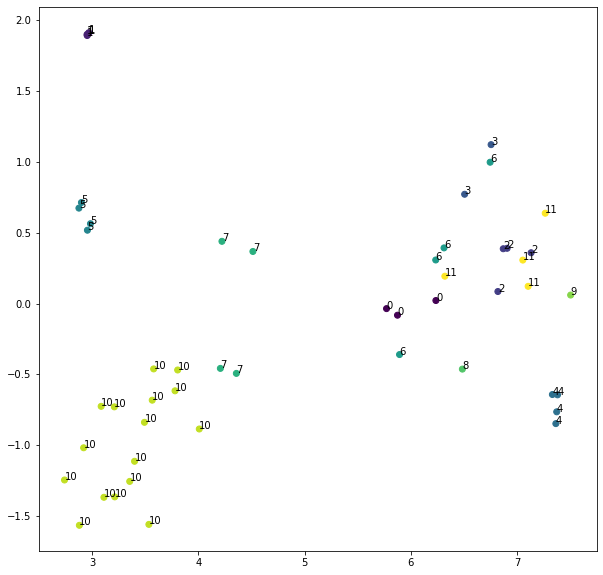

In [68]:
from sklearn.manifold import TSNE
X_tsne = TSNE(learning_rate=5).fit_transform(features)
print(len(audioset))
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=audioname)
for i in range(len(audioname)):
    plt.text(X_tsne[i,0],X_tsne[i,1],s=audioname[i])
plt.show()

In [65]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [66]:
clf = SVC(C=1,kernel='rbf',gamma=0.1,decision_function_shape='ovr')
clf.fit(features,audioname)
y_pre = clf.predict(features)
print(y_pre)
print(audioname)
accuracy_score(audioname,y_pre)

[ 0  0  0  1  1  1  1  2  2  2  2  3  3  4  4  4  4  5  5  5  5  6  6  6
  6  7  7  7  7  8  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11
 11 11 11]
[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11]


1.0

[ 0  0  0  1  1  1  1  2  2  2  2  3  3  4  4  4  4  5  5  5  5  6  6  6
  6  7  7  7  7  8  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11
 11 11 11]
[ 0  0  0  1  1  1  1 11  2  2  2  3  3  4  4  4  4  5  5  5  5  6  6  3
  0  7  7  7  7  8  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11
  2 11 11]
0.9215686274509803


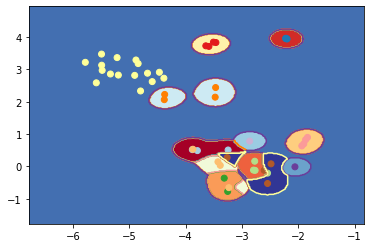

In [67]:
X = np.array(X_tsne)
y = np.array(audioname)

clf = SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr').fit(X, y)
y_pre = clf.predict(X)
print(y)
print(y_pre)
print(accuracy_score(y,y_pre))

x1_min, x1_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
x2_min, x2_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.RdYlBu)
plt.contour(xx1, xx2, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

目标识别乐器：
A调曲笛C0280
提取梅尔频谱特征完毕
提取识别特征完毕
51
{'筒音': 0, '演奏技法，单吐': 1, '演奏技法，打音': 2, '演奏技法，泛音': 3, '演奏技法，双吐': 4, '演奏技法，三吐': 5, '演奏技法，花舌': 6, '演奏技法，历音': 7, '演奏技法，循环换气': 8, '演奏技法，指颤音': 9, '演奏技法，滑音': 10, '演奏技法，叠音': 11}


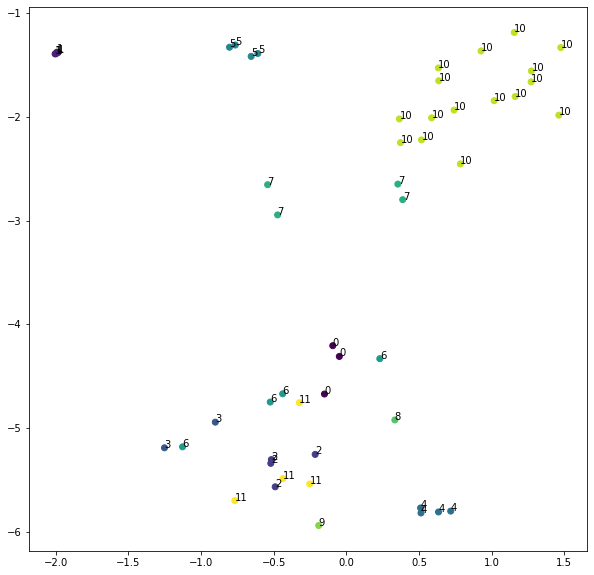

使用总特征
1.0
使用降维后的特征
0.9215686274509803
目标识别乐器：
G调新笛C0281
提取梅尔频谱特征完毕
提取识别特征完毕
59
{'筒音': 0, '演奏技法，单吐': 1, '演奏技法，叠音': 2, '演奏技法，打音': 3, '演奏技法，双吐': 4, '演奏技法，三吐': 5, '演奏技法，花舌': 6, '演奏技法，历音': 7, '演奏技法，循环换气': 8, '演奏技法，指颤音': 9, '演奏技法，滑音': 10, '演奏技法，泛音': 11}


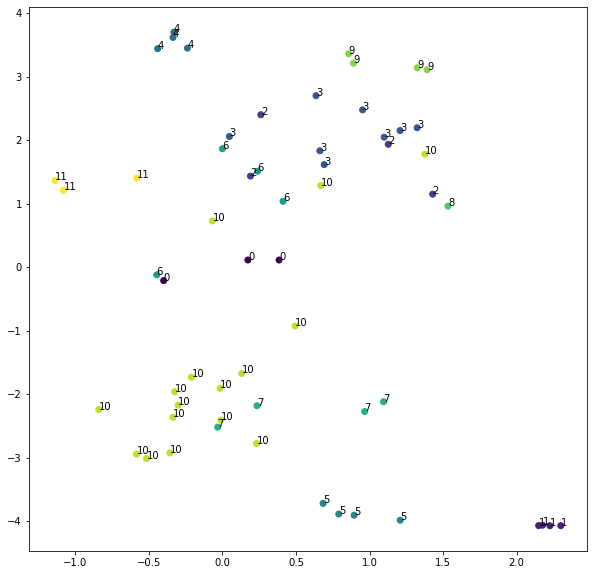

使用总特征
1.0
使用降维后的特征
0.9322033898305084
目标识别乐器：
G调梆笛C0237
提取梅尔频谱特征完毕
提取识别特征完毕
201
{'筒音': 0, '演奏技法，单吐': 1, '演奏技法，气颤音': 2, '演奏技法，花舌与滑音': 3, '演奏技法，复滑音': 4, '演奏技法，上滑音': 5, '演奏技法，双吐': 6, '演奏技法，三吐': 7, '演奏技法，花舌': 8, '演奏技法，弱音': 9, '演奏技法，上历音': 10, '演奏技法，下历音': 11, '演奏技法，循环换气': 12, '演奏技法，指颤音': 13}


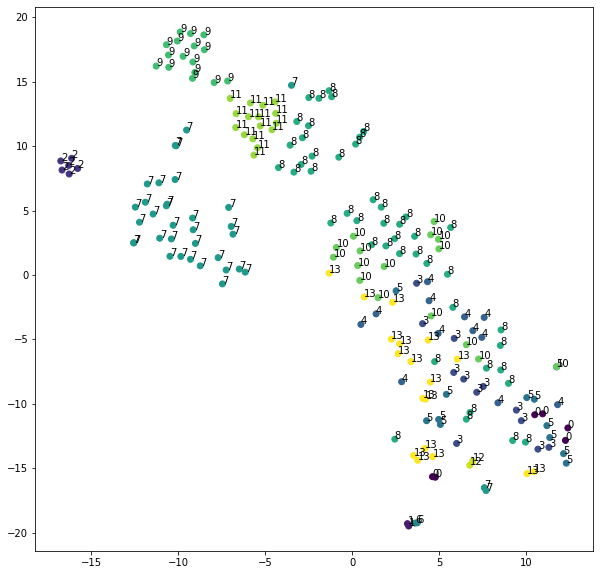

使用总特征
1.0
使用降维后的特征
0.9950248756218906
目标识别乐器：
三弦T0289
提取梅尔频谱特征完毕
提取识别特征完毕
242
{'演奏技法，剁弦': 1, '演奏技法，指弦，力度弱': 2, '演奏技法，指弦，力度强': 3, '演奏技法，分弦': 4, '演奏技法，扣弦': 5, '演奏技法，摇指': 6, '演奏技法，上弹': 7, '演奏技法，打音': 8, '演奏技法，左手打音': 9, '演奏技法，粘音': 10, '演奏技法，左手吟音': 11, '演奏技法，左手泛音': 12, '演奏技法，双弹': 13, '演奏技法，扫弦，力度弱': 14, '演奏技法，扫弦，力度强': 15, '演奏技法，扫弦': 16, '演奏技法，扶弦，力度弱': 17, '演奏技法，扶弦，力度强': 18, '演奏技法，挑弦，力度弱': 19, '演奏技法，挑弦，力度强': 20, '演奏技法，滚弦，力度弱': 21, '演奏技法，滚弦，力度强': 22, '演奏技法，五指轮，力度弱': 23, '演奏技法，五指轮，力度强': 24, '演奏技法，抹弦': 25, '演奏技法，勾弦': 26}


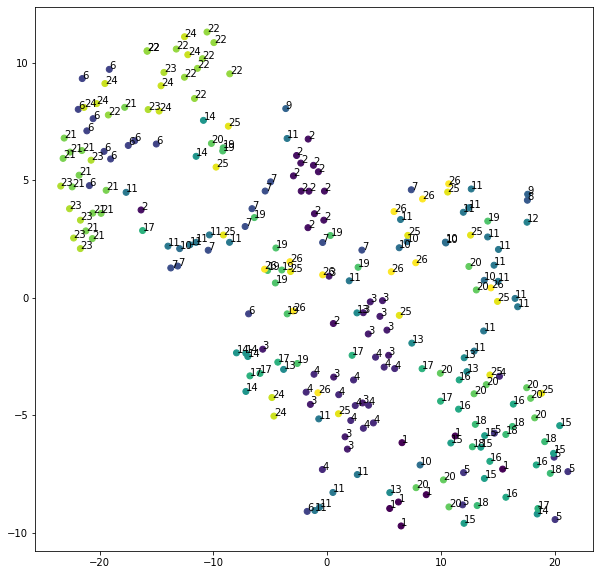

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
中国大鼓D0248
提取梅尔频谱特征完毕
提取识别特征完毕
102
{'敲': 1, '演奏技法，鼓边': 2, '演奏技法，鼓梆': 3, '演奏技法，鼓钉': 4, '演奏技法，双传同击': 5, '演奏技法，双传同击，鼓梆': 6, '演奏技法，闷击': 7, '演奏技法，闷击，击锤': 8, '演奏技法，边击': 9, '演奏技法，滚奏': 10}


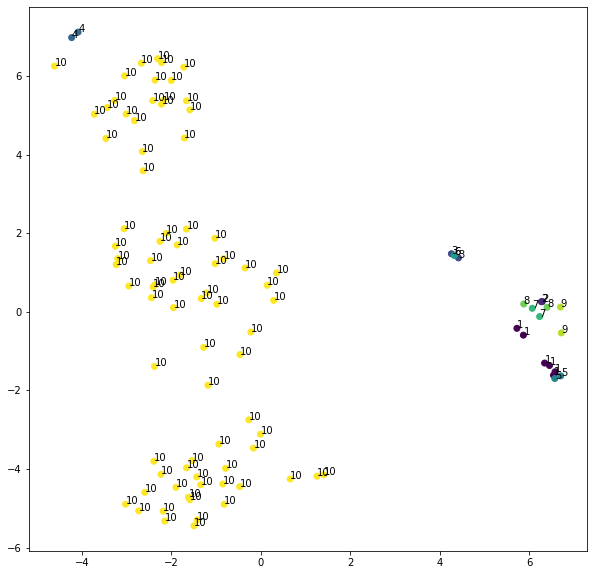

使用总特征
1.0
使用降维后的特征
0.9803921568627451
目标识别乐器：
中胡L0297
提取梅尔频谱特征完毕
提取识别特征完毕
66
{'空弦音': 1, '演奏技法，拨音': 2, '演奏技法，垫指滑音': 9, '演奏技法，颤弓': 4, '演奏技法，掏弓': 5, '演奏技法，打音': 6, '演奏技法，滑音': 7, '演奏技法，回滑音': 8, '演奏技法，右手拨弦': 10, '演奏技法，左手拨弦': 11}


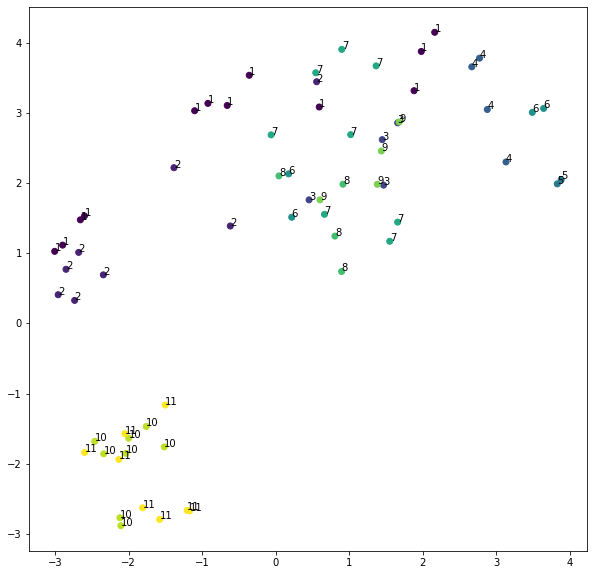

使用总特征
1.0
使用降维后的特征
0.9393939393939394
目标识别乐器：
中虎D0273
提取梅尔频谱特征完毕
提取识别特征完毕
12
{'敲': 1, '演奏技法，沿击': 2, '演奏技法，锣梆': 3, '演奏技法，锣光边': 4}


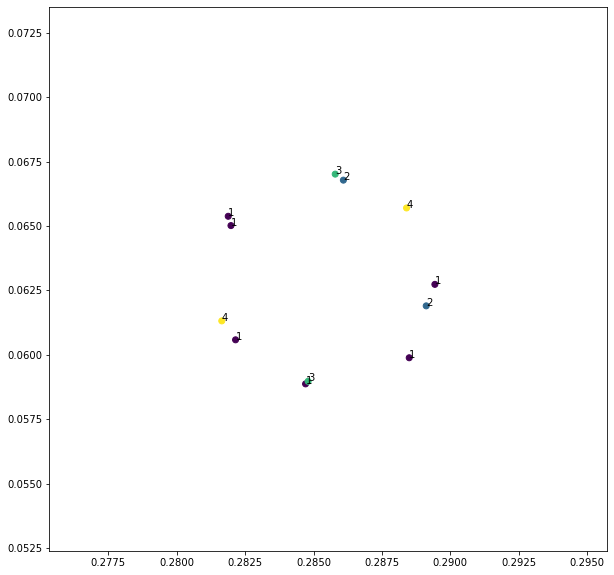

使用总特征
1.0
使用降维后的特征
0.5
目标识别乐器：
中阮T0260
提取梅尔频谱特征完毕
目标识别乐器：
中音加键唢呐C0259
提取梅尔频谱特征完毕
提取识别特征完毕
60
{'筒音': 1, '演奏技法，单吐': 2, '演奏技法，双吐': 3, '演奏技法，三吐': 4}


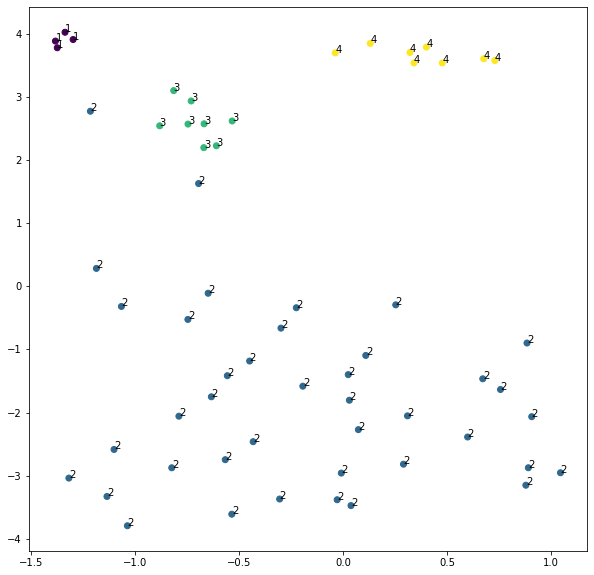

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
中音板胡L0240
提取梅尔频谱特征完毕
提取识别特征完毕
86
{'空弦音': 1, '演奏技法，上滑音': 2, '演奏技法，抛弓': 3, '演奏技法，垫弓': 4, '演奏技法，下滑音': 5, '演奏技法，回滑音': 6, '演奏技法，垫指滑音': 7, '演奏技法，大上滑音': 8, '演奏技法，大下滑音': 9, '演奏技法，揉弦': 10, '演奏技法，滑揉': 11, '演奏技法，打音': 12}


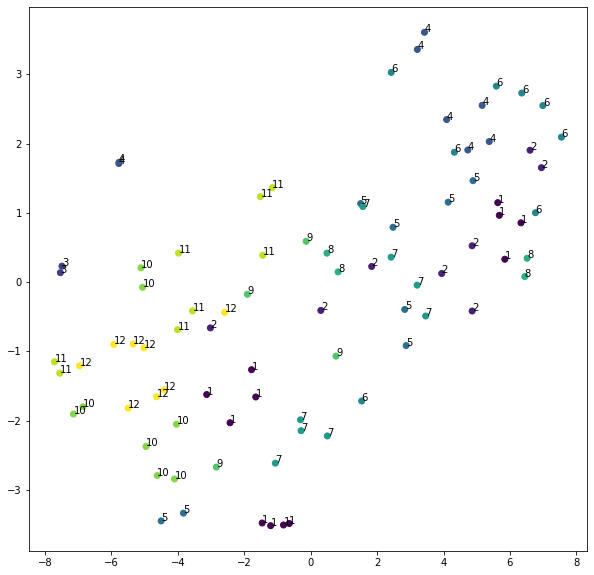

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
中音笙C0263
提取梅尔频谱特征完毕
提取识别特征完毕
64
{'演奏技法，音程，单吐，力度弱': 4, '演奏技法，音程，单吐，力度中': 5, '演奏技法，音程，单吐，力度强': 6, '演奏技法，喉颤音': 7, '演奏技法，传统和声，力度弱': 11, '演奏技法，传统和声，力度中': 12, '演奏技法，传统和声，力度强': 13, '演奏技法，和弦，力度弱': 17, '演奏技法，和弦，力度中': 18, '演奏技法，和弦，力度强': 19, '演奏技法，气花舌': 20, '演奏技法，呼花舌': 21, '演奏技法，呼舌，力度弱': 22, '演奏技法，呼舌，力度中': 23, '演奏技法，呼舌，力度强': 24, '演奏技法，碎吐': 25, '演奏技法，腹颤音，力度弱': 26, '演奏技法，腹颤音，力度中': 27, '演奏技法，腹颤音，力度强': 28, '演奏技法，舌颤音': 29}


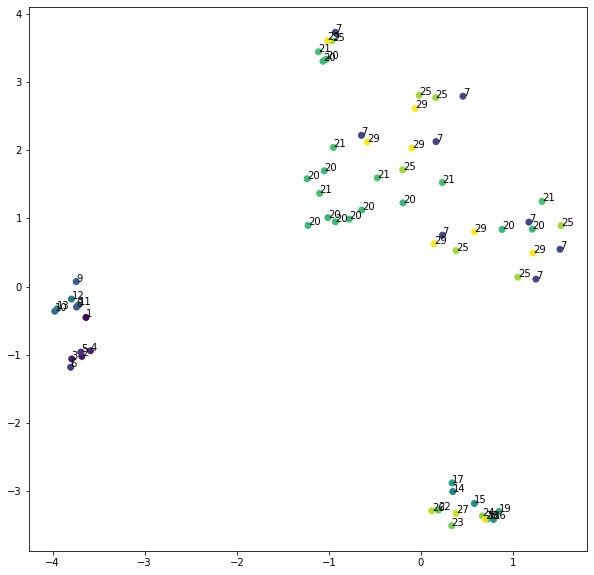

使用总特征
1.0
使用降维后的特征
0.953125
目标识别乐器：
二弦L0285
提取梅尔频谱特征完毕
提取识别特征完毕
7
{'演奏技法，扽弓': 1, '演奏技法，三吹': 2, '演奏技法，单吹': 3, '演奏技法，双吹': 4, '演奏技法，起六吹': 5}


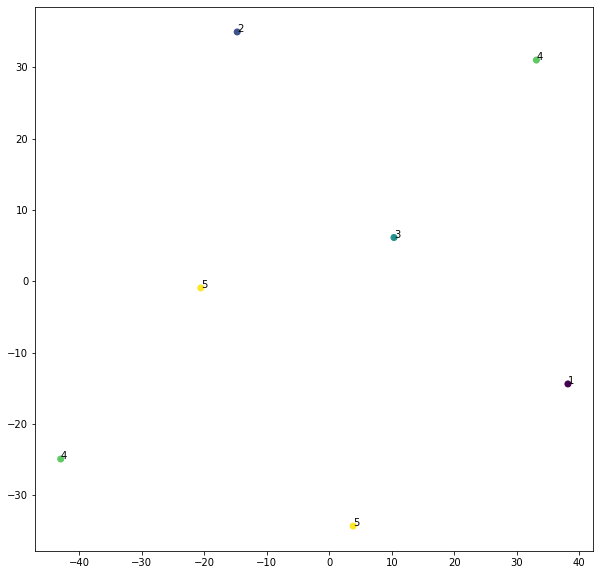

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
二胡L0266
提取梅尔频谱特征完毕
提取识别特征完毕
285
{'空弦音': 1, '演奏技法，连弓，力度弱': 5, '演奏技法，连弓，力度强': 6, '演奏技法，连弓，力度中': 7, '演奏技法，下滑音': 8, '演奏技法，连线滑音': 9, '演奏技法，垫指滑音': 10, '演奏技法，大上滑音': 11, '演奏技法，大下滑音': 12, '演奏技法，下回滑音': 13, '演奏技法，后下回滑音': 14, '演奏技法，滚揉': 15, '演奏技法，压揉': 16, '演奏技法，滑揉': 17, '演奏技法，抛弓': 18, '演奏技法，十道揉弦': 19, '演奏技法，自然散音': 20, '演奏技法，人工泛音': 21, '演奏技法，右手拨弦，力度弱': 25, '演奏技法，右手拨弦，力度强': 26, '演奏技法，右手拨弦，力度中': 27, '演奏技法，左手勾弦右手拉奏': 28, '演奏技法，左手勾弦': 29, '演奏技法，垫弓': 30, '演奏技法，背弓': 31, '演奏技法，大击弓': 32, '演奏技法，弓杆击琴筒': 33, '演奏技法，上颤音': 34, '演奏技法，下颤音': 35, '演奏技法，上滑音': 36}


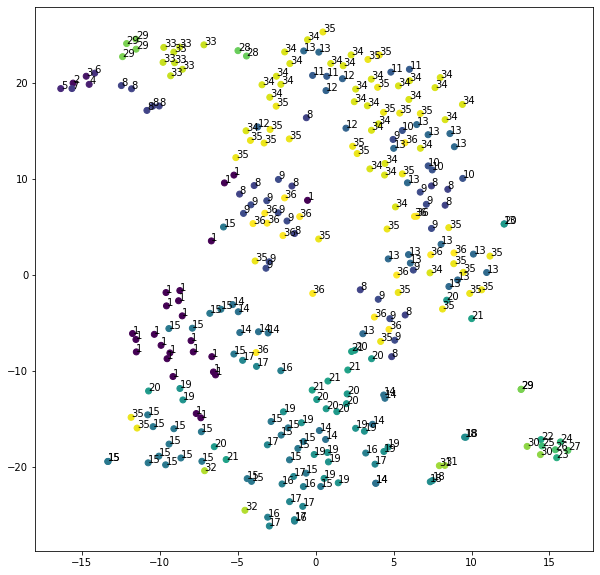

使用总特征
1.0
使用降维后的特征
0.9964912280701754
目标识别乐器：
云锣D0279
提取梅尔频谱特征完毕
目标识别乐器：
五音排鼓D0252
提取梅尔频谱特征完毕
提取识别特征完毕
32
{'敲': 0, '演奏技法，滚奏': 1}


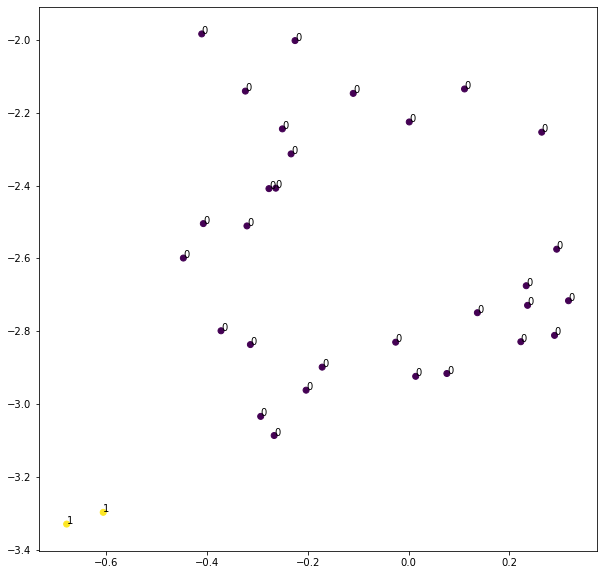

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
传统笙C0244
提取梅尔频谱特征完毕
提取识别特征完毕
84
{'演奏技法，单吐': 1, '演奏技法，双吐': 2, '演奏技法，三吐': 3, '演奏技法，花舌': 4, '演奏技法，呼舌': 5, '演奏技法，腹颤音': 6, '演奏技法，喉颤音': 7, '演奏技法，上滑音': 8, '演奏技法，传统和音': 9}


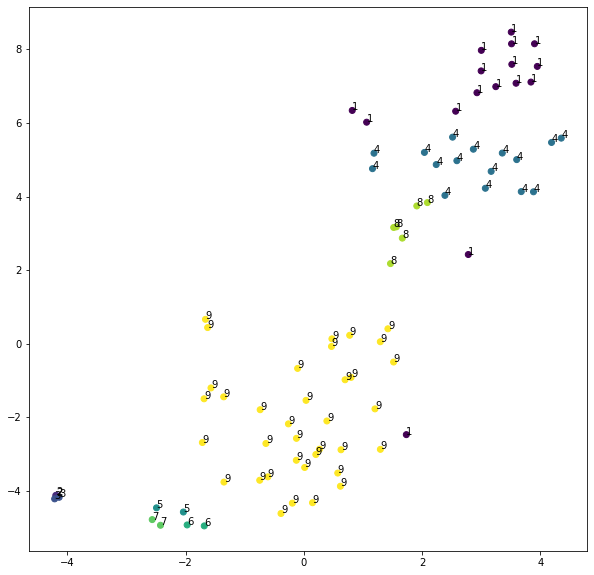

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
低音加键唢呐C0257
提取梅尔频谱特征完毕
目标识别乐器：
低音笙C0264
提取梅尔频谱特征完毕
提取识别特征完毕
37
{'演奏技法，音程，力度弱': 4, '演奏技法，音程，力度强': 5, '演奏技法，音程，力度中': 6}


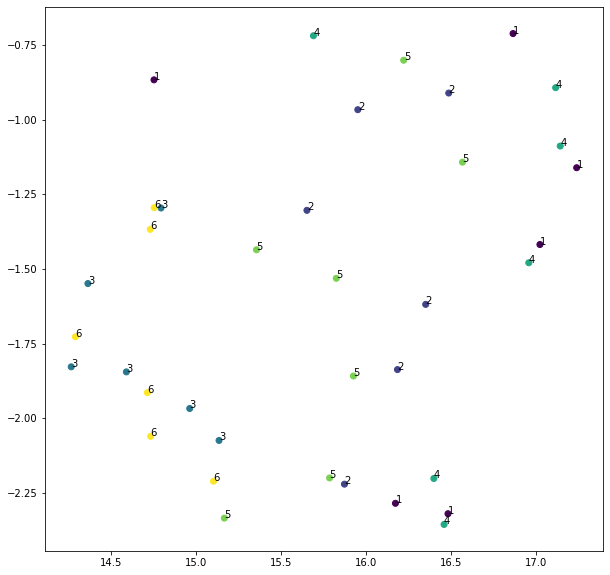

使用总特征
1.0
使用降维后的特征
0.8648648648648649
目标识别乐器：
侗笛C0316
提取梅尔频谱特征完毕
提取识别特征完毕
32
{'筒音': 5, '演奏技法，打音': 2, '演奏技法，花舌': 3, '演奏技法，滑音': 4, '演奏技法，双管': 6, '演奏技法，循环换气': 7}


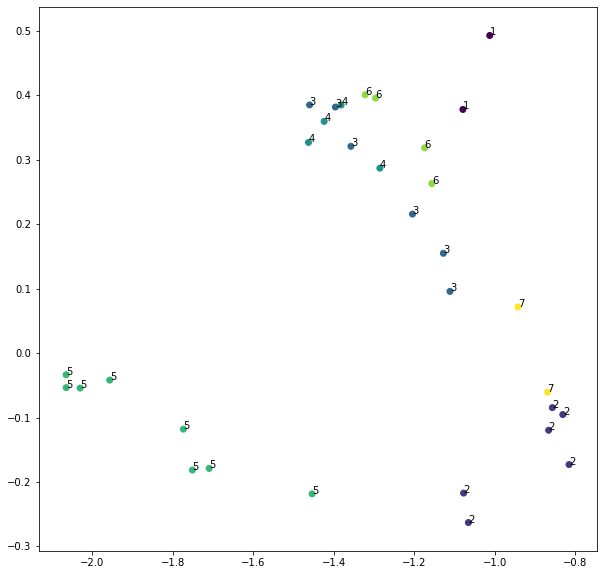

使用总特征
1.0
使用降维后的特征
0.8125
目标识别乐器：
俄比C0311
提取梅尔频谱特征完毕
提取识别特征完毕
77
{'筒音': 1, '演奏技法，叠音': 2, '演奏技法，气震音': 3}


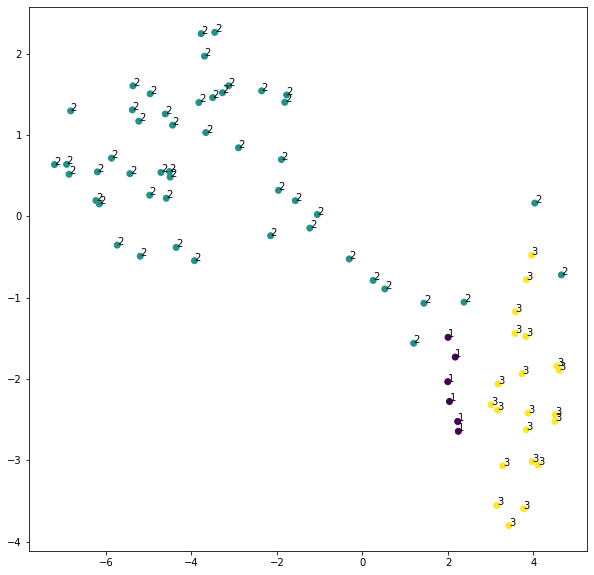

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
傈僳族奇奔T0302
提取梅尔频谱特征完毕
提取识别特征完毕
93
{'弹': 1, '演奏技法，弹挑': 2, '演奏技法，轮音': 3, '演奏技法，扫弦': 4, '演奏技法，琶音': 5, '演奏技法，泛音': 6}


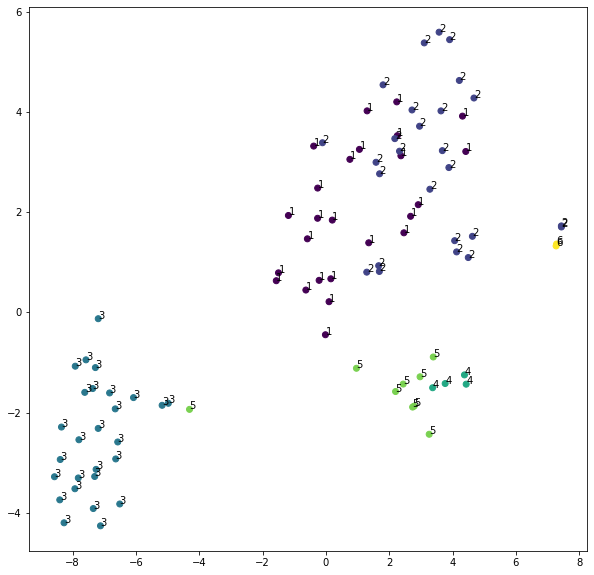

使用总特征
1.0
使用降维后的特征
0.989247311827957
目标识别乐器：
六角高胡L0292
提取梅尔频谱特征完毕
目标识别乐器：
北梆子D0246
提取梅尔频谱特征完毕
目标识别乐器：
南梆子D0245
提取梅尔频谱特征完毕
目标识别乐器：
南音三弦T0295
提取梅尔频谱特征完毕
提取识别特征完毕
16
{'弹': 1, '演奏技法，弹': 2, '演奏技法，挑': 3, '演奏技法，慢捻': 4, '演奏技法，快捻': 5, '演奏技法，琶音': 6}


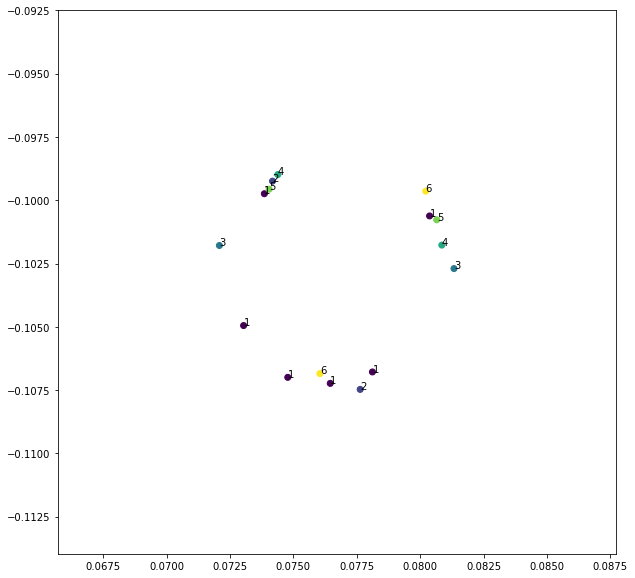

使用总特征
1.0
使用降维后的特征
0.375
目标识别乐器：
南音二弦L0293
提取梅尔频谱特征完毕
目标识别乐器：
南音琵琶T0294
提取梅尔频谱特征完毕
提取识别特征完毕
26
{'弹': 1, '演奏技法，弹': 2, '演奏技法，挑': 3, '演奏技法，夹线': 4, '演奏技法，勾': 5, '演奏技法，落子': 6, '演奏技法，慢捻': 7, '演奏技法，快捻': 8, '演奏技法，假勾': 9, '演奏技法，假挑': 10}


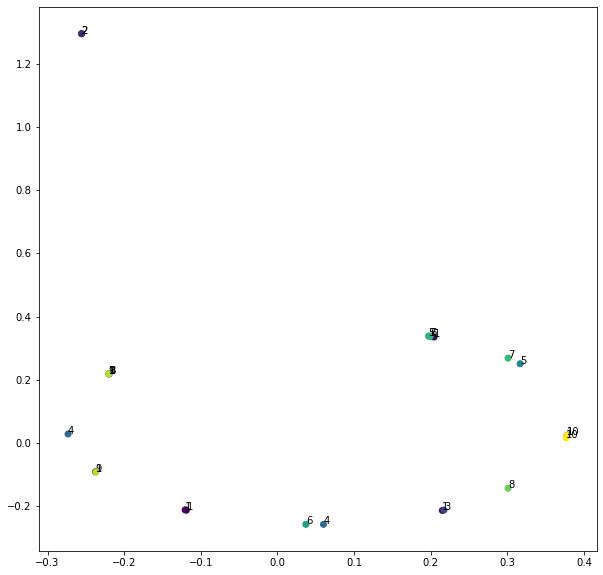

使用总特征
1.0
使用降维后的特征
0.46153846153846156
目标识别乐器：
古筝T0255
提取梅尔频谱特征完毕
提取识别特征完毕
63
{'演奏技法，上滑': 1, '演奏技法，轮指': 2, '演奏技法，刮奏': 3, '演奏技法，拍弦': 4, '演奏技法，下滑': 5, '演奏技法，揉弦': 6, '演奏技法，颤弦': 7, '演奏技法，重颤': 8, '演奏技法，泛音': 9, '演奏技法，扫弦': 10, '演奏技法，肉拨弦': 11, '演奏技法，摇指': 12}


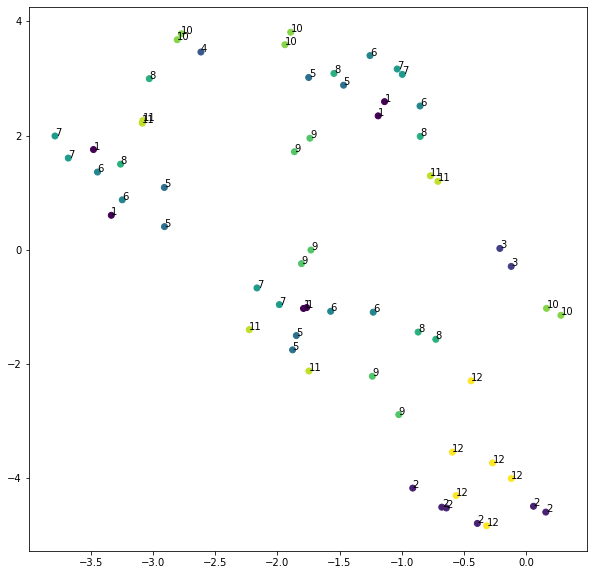

使用总特征
1.0
使用降维后的特征
0.9841269841269841
目标识别乐器：
吐良C0308
提取梅尔频谱特征完毕
提取识别特征完毕
170
{'筒音': 1, '演奏技法，颤音': 2, '演奏技法，单吐': 3, '演奏技法，双吐': 4, '演奏技法，三吐': 5, '演奏技法，气震音': 6, '演奏技法，气滑音': 7}


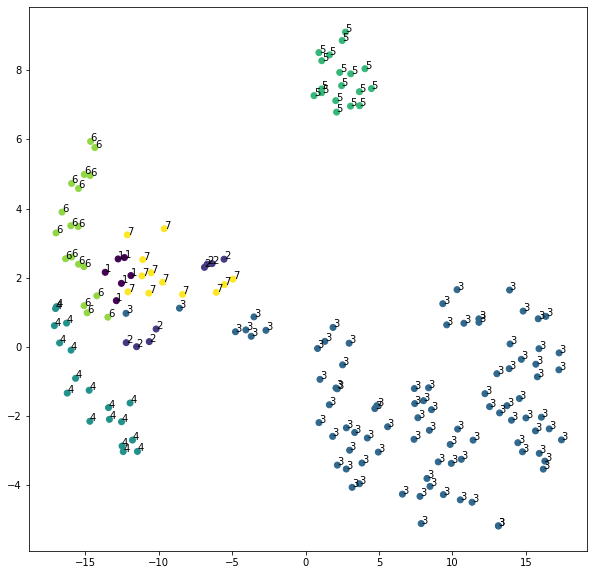

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
唢呐C0296
提取梅尔频谱特征完毕
提取识别特征完毕
145
{'演奏技法，垫音': 7, '演奏技法，气颤音': 2, '演奏技法，气顶音': 3, '演奏技法，三吐': 4, '演奏技法，指音': 5, '演奏技法，双吐': 6, '演奏技法，指揉音': 8, '演奏技法，轮压音': 9, '演奏技法，低摇': 10, '演奏技法，变色音': 11, '演奏技法，打音': 12, '演奏技法，单吐': 13, '演奏技法，抬合': 14, '演奏技法，花舌': 15, '演奏技法，滑音': 16, '演奏技法，呼音': 17}


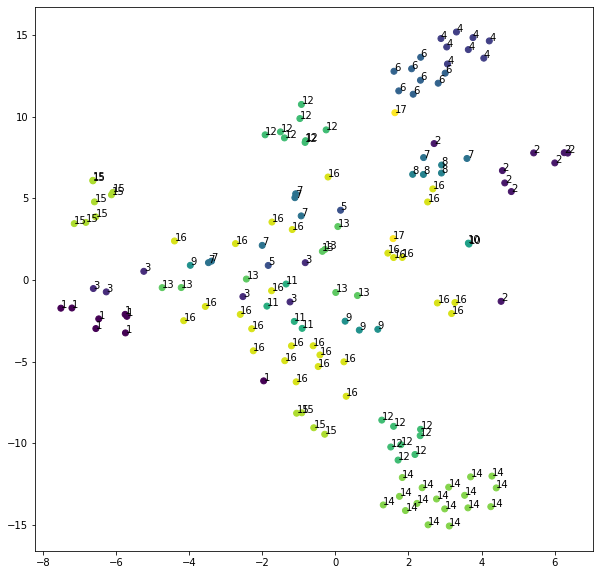

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
埙C0283
提取梅尔频谱特征完毕
提取识别特征完毕
27
{'筒音': 1, '演奏技法，打音': 2, '演奏技法，叠音': 3, '演奏技法，单吐': 4}


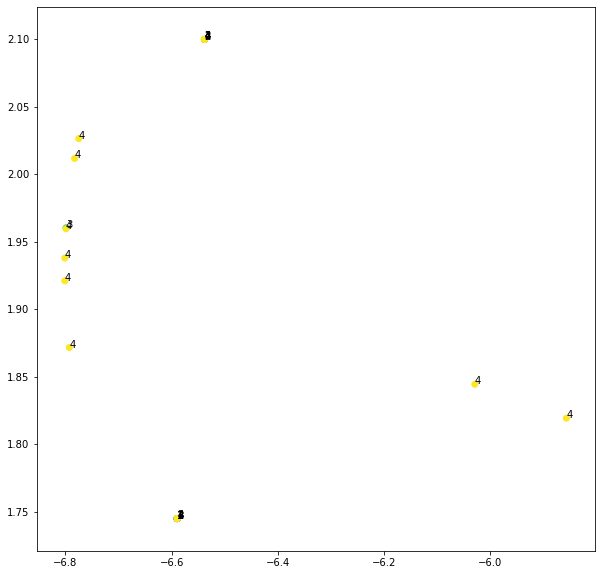

使用总特征
1.0
使用降维后的特征
0.5925925925925926
目标识别乐器：
大镲D0290
提取梅尔频谱特征完毕
提取识别特征完毕
14
{'敲': 1, '演奏技法，闷击': 2, '演奏技法，磨击': 3, '演奏技法，磕击': 4, '演奏技法，垫击': 5}


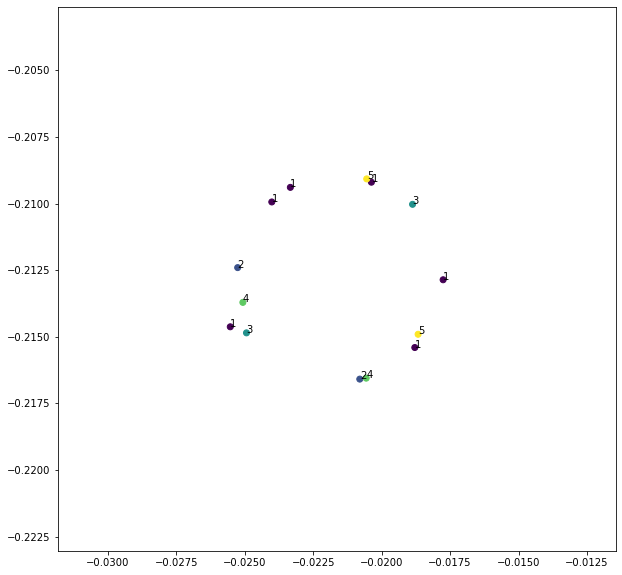

使用总特征
1.0
使用降维后的特征
0.42857142857142855
目标识别乐器：
小堂鼓D0250
提取梅尔频谱特征完毕
提取识别特征完毕
14
{'敲': 1, '演奏技法，鼓边': 2, '演奏技法，鼓梆': 3, '演奏技法，滚奏': 4, '演奏技法，指音击鼓': 5}


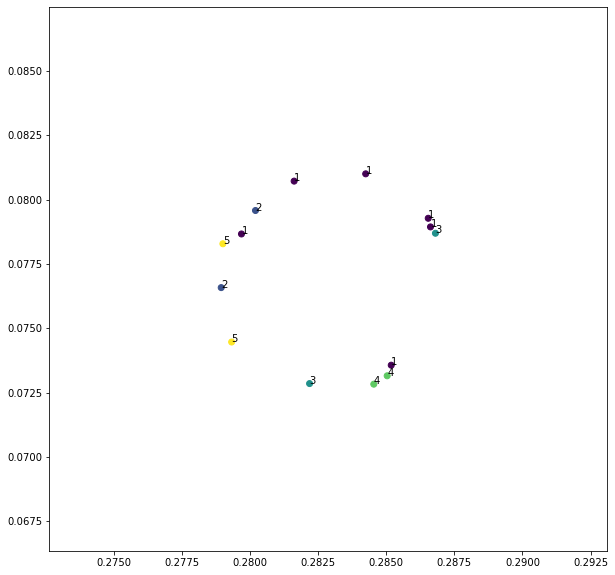

使用总特征
1.0
使用降维后的特征
0.42857142857142855
目标识别乐器：
小锣D0275
提取梅尔频谱特征完毕
提取识别特征完毕
8
{'敲': 1, '演奏技法，指音': 2}


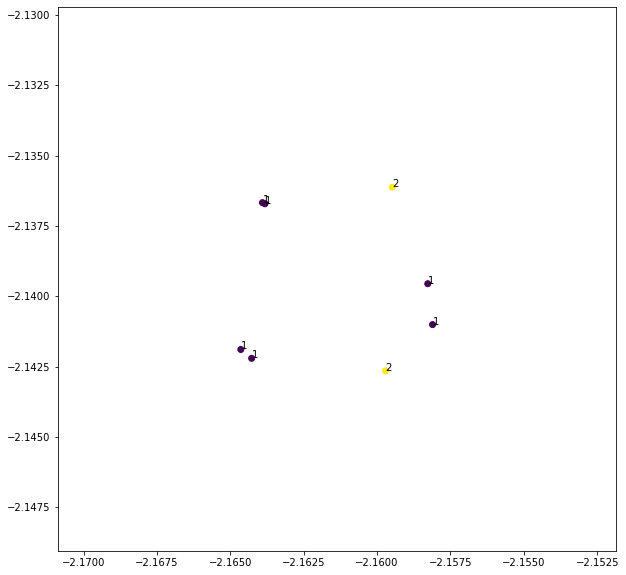

使用总特征
1.0
使用降维后的特征
0.75
目标识别乐器：
小镲D0271
提取梅尔频谱特征完毕
提取识别特征完毕
14
{'敲': 1, '演奏技法，擦击': 2, '演奏技法，闷击': 3, '演奏技法，磨击': 4, '演奏技法，磕边': 5, '演奏技法，磕击': 6}


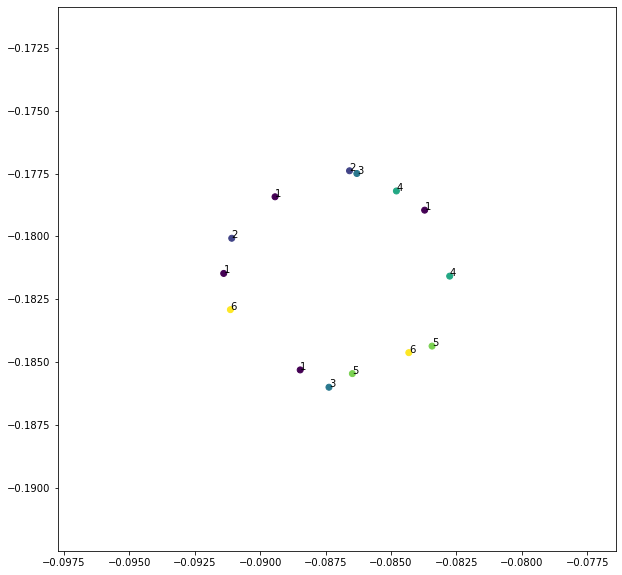

使用总特征
1.0
使用降维后的特征
0.2857142857142857
目标识别乐器：
小闷笛C0303
提取梅尔频谱特征完毕
提取识别特征完毕
59
{'筒音': 1, '演奏技法，扇': 2, '演奏技法，闷': 3, '演奏技法，滑音': 4, '演奏技法，叠音': 5, '演奏技法，腹震音': 6, '演奏技法，气顶音': 7, '演奏技法，气顶音第二种': 8}


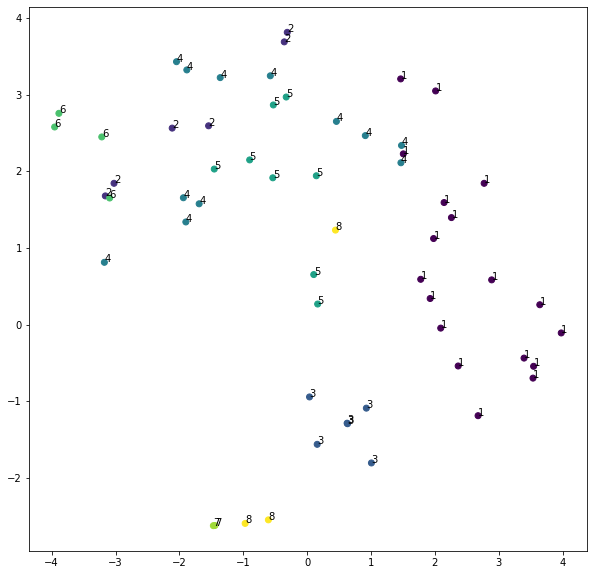

使用总特征
1.0
使用降维后的特征
0.9661016949152542
目标识别乐器：
巴乌C0310
提取梅尔频谱特征完毕
提取识别特征完毕
264
{'筒音': 1, '演奏技法，气震音': 2, '演奏技法，叠音': 3, '演奏技法，打音': 4, '演奏技法，拨音': 5, '演奏技法，虚指颤音': 6, '演奏技法，滑音': 7, '演奏技法，单吐': 8, '演奏技法，双吐': 9, '演奏技法，三吐': 10}


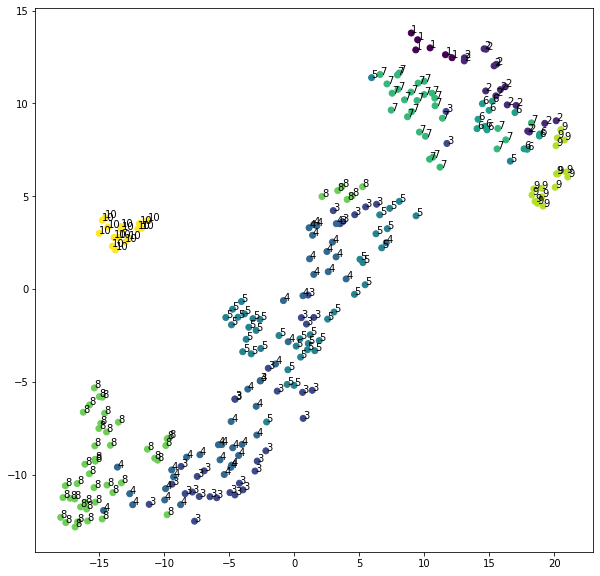

使用总特征
1.0
使用降维后的特征
0.9962121212121212
目标识别乐器：
德C0305
提取梅尔频谱特征完毕
提取识别特征完毕
14
{'筒音': 1, '演奏技法，扇音': 2}


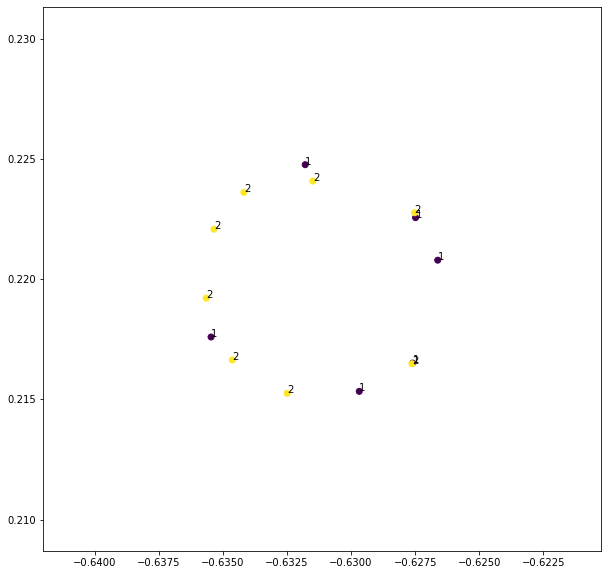

使用总特征
1.0
使用降维后的特征
0.5714285714285714
目标识别乐器：
扁八角高胡L0291
提取梅尔频谱特征完毕
目标识别乐器：
扁鼓D0251
提取梅尔频谱特征完毕
提取识别特征完毕
12
{'敲': 1, '演奏技法，鼓边': 2, '演奏技法，鼓梆': 3, '演奏技法，鼓钉': 4}


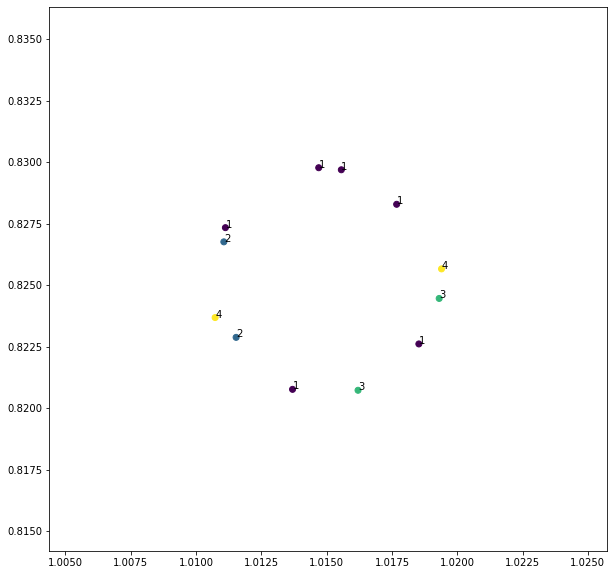

使用总特征
1.0
使用降维后的特征
0.5
目标识别乐器：
扬琴T0267
提取梅尔频谱特征完毕
提取识别特征完毕
260
{'演奏技法，单一轮': 1, '演奏技法，上下滑拨': 5, '演奏技法，指肚上下滑拨': 3, '演奏技法，击板': 4, '演奏技法，无序滑音': 6}


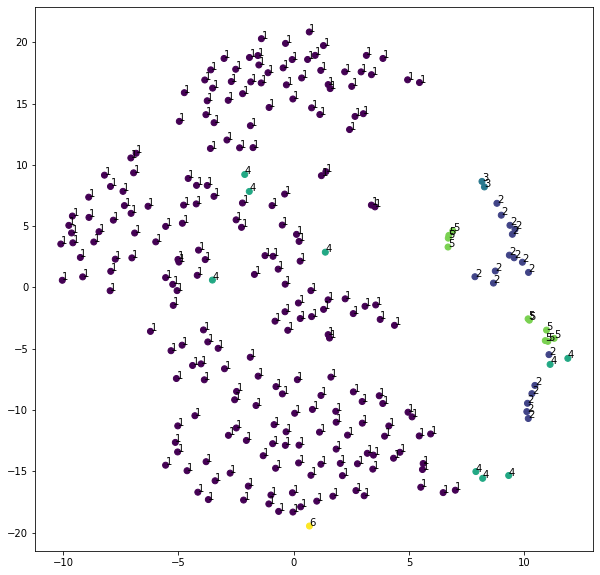

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
抄锣D0272
提取梅尔频谱特征完毕
提取识别特征完毕
12
{'敲': 1, '演奏技法，锣梆': 2, '演奏技法，锣光边': 3, '演奏技法，点击': 4}


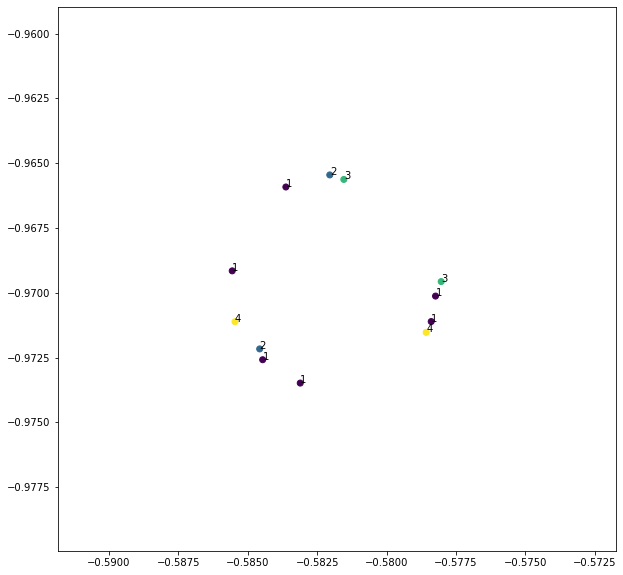

使用总特征
1.0
使用降维后的特征
0.5
目标识别乐器：
拉祜族葫芦笙C0306
提取梅尔频谱特征完毕
提取识别特征完毕
47
{'演奏技法，传统和声': 1, '演奏技法，保持音': 2, '演奏技法，滑音': 3, '演奏技法，单吐': 4, '演奏技法，颤指': 5, '演奏技法，腹颤音': 6, '演奏技法，打音': 7}


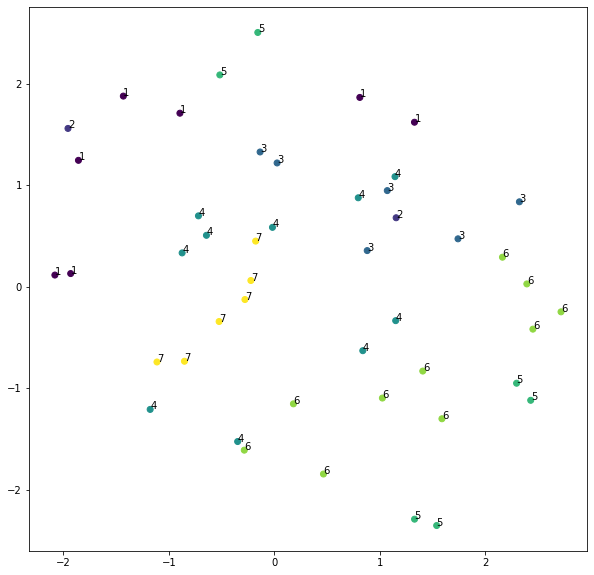

使用总特征
1.0
使用降维后的特征
0.9787234042553191
目标识别乐器：
斗锣D0284
提取梅尔频谱特征完毕
目标识别乐器：
曲锣D0286
提取梅尔频谱特征完毕
提取识别特征完毕
4
{'演奏技法，立': 1, '演奏技法，吊': 2}


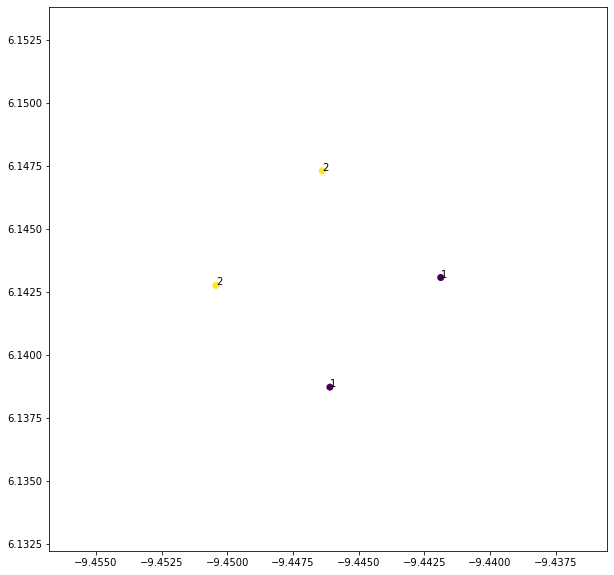

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
木鱼D0277
提取梅尔频谱特征完毕
目标识别乐器：
板鼓D0278
提取梅尔频谱特征完毕
提取识别特征完毕
9
{'敲': 0, '演奏技法，双箭同击': 1, '演奏技法，哆咯': 2, '演奏技法，慢起渐快': 3}


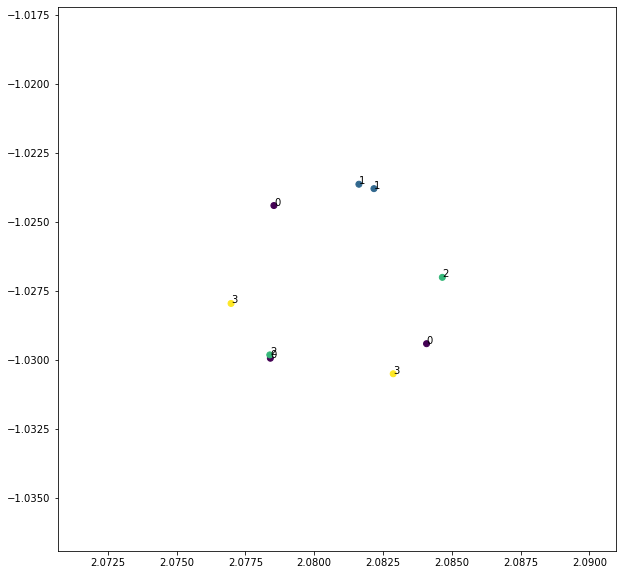

使用总特征
1.0
使用降维后的特征
0.3333333333333333
目标识别乐器：
柳琴T0261
提取梅尔频谱特征完毕
提取识别特征完毕
196
{'弹': 1, '演奏技法，弹': 2, '演奏技法，空弦勾弦': 3, '演奏技法，拾音勾弦': 4, '演奏技法，推拉弦': 5, '演奏技法，揉弦': 6, '演奏技法，泛音': 7, '演奏技法，挑': 8, '演奏技法，双弹': 9, '演奏技法，扫': 10, '演奏技法，扶': 11, '演奏技法，长轮': 12, '演奏技法，小轮': 13, '演奏技法，双轮': 14, '演奏技法，带轮': 15}


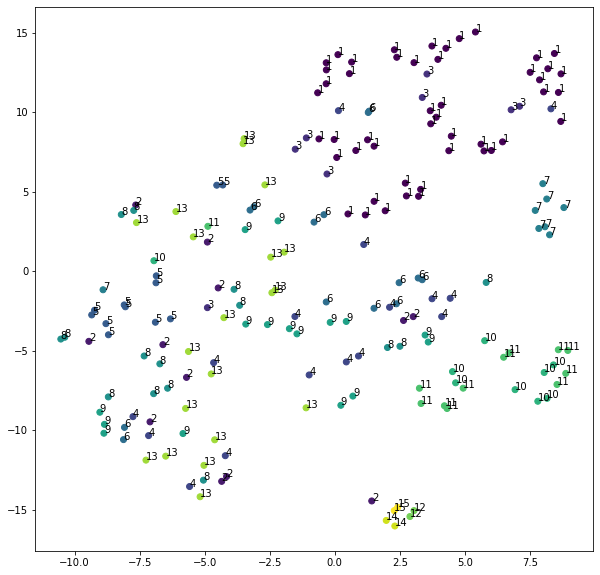

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
武锣D0274
提取梅尔频谱特征完毕
提取识别特征完毕
12
{'敲': 1, '演奏技法，沿击': 2, '演奏技法，锣梆': 3, '演奏技法，锣光边': 4}


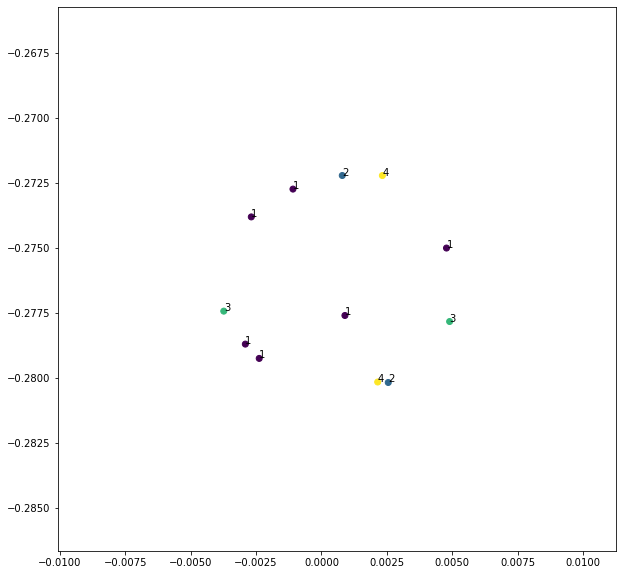

使用总特征
1.0
使用降维后的特征
0.5
目标识别乐器：
洞巴C0304
提取梅尔频谱特征完毕
提取识别特征完毕
55
{'筒音': 1, '演奏技法，叠音': 2, '演奏技法，指颤音': 3, '演奏技法，腹颤音': 4, '演奏技法，单吐': 5}


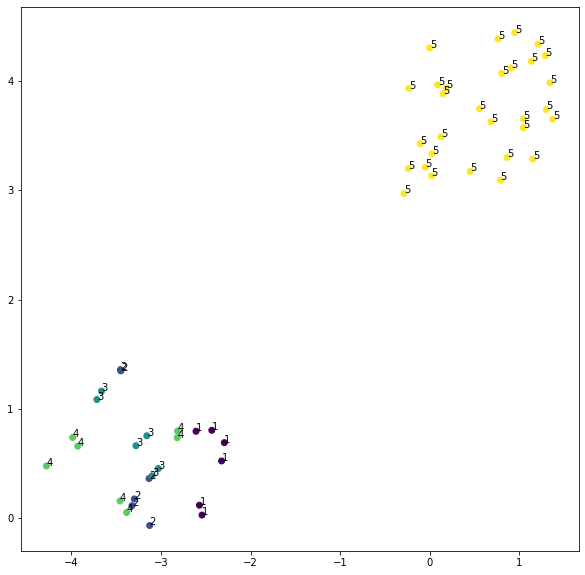

使用总特征
1.0
使用降维后的特征
0.9818181818181818
目标识别乐器：
深波D0287
提取梅尔频谱特征完毕
提取识别特征完毕
22
{'演奏技法，长音': 1, '演奏技法，短音': 2}


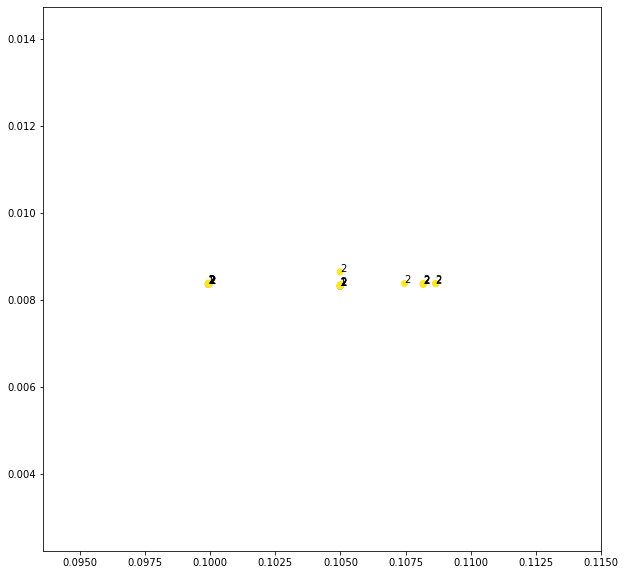

使用总特征
1.0
使用降维后的特征
0.9090909090909091
目标识别乐器：
澜沧小三弦T0300
提取梅尔频谱特征完毕
提取识别特征完毕
66
{'弹': 1, '演奏技法，弹挑': 2, '演奏技法，轮音': 3, '演奏技法，滑音': 4, '演奏技法，揉弦': 5, '演奏技法，泛音': 6}


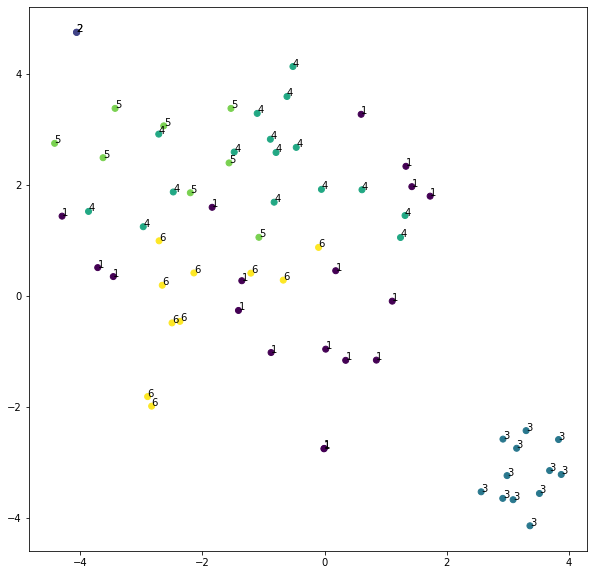

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
牛角琴L0312
提取梅尔频谱特征完毕
提取识别特征完毕
187
{'空弦音': 1, '演奏技法，双弦音': 2, '演奏技法，跪指拨弦': 3, '演奏技法，双弦音第二种': 4, '演奏技法，顿弓': 5, '演奏技法，连顿弓': 6, '演奏技法，连跳弓': 7, '演奏技法，滑音': 8, '演奏技法，打音': 9, '演奏技法，颤音': 10, '演奏技法，揉弦': 11}


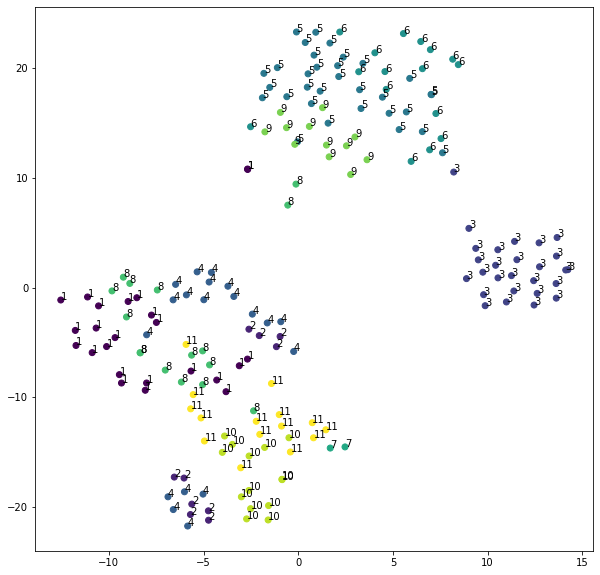

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
独弦琴T0317
提取梅尔频谱特征完毕
提取识别特征完毕
48
{'弹': 1, '演奏技法，颤音': 2, '演奏技法，颤音2': 3, '演奏技法，颤音3': 4, '演奏技法，拍弹': 5, '演奏技法，拍奏': 6, '演奏技法，碰杆': 7}


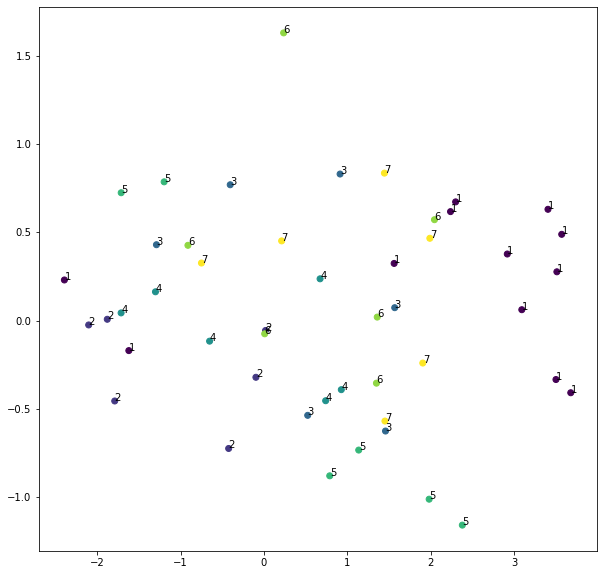

使用总特征
1.0
使用降维后的特征
0.9791666666666666
目标识别乐器：
独弦胡L0313
提取梅尔频谱特征完毕
提取识别特征完毕
22
{'空弦音': 1, '演奏技法，摇弦': 2, '演奏技法，压弦': 3, '演奏技法，滑音': 4, '演奏技法，左手滑弦拨奏': 5}


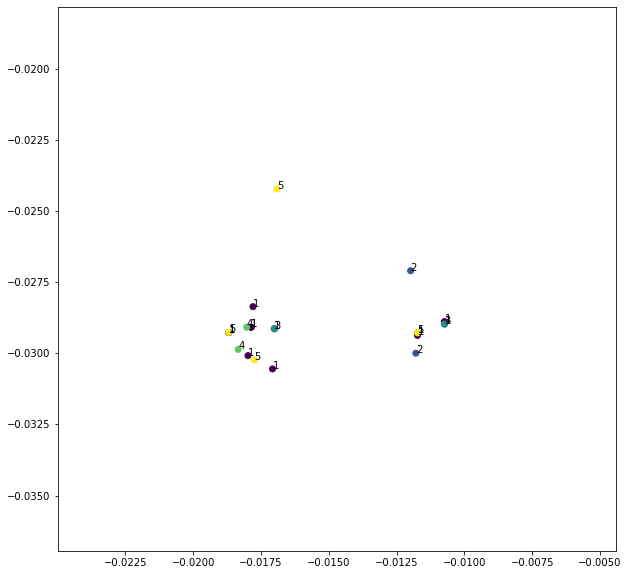

使用总特征
1.0
使用降维后的特征
0.5454545454545454
目标识别乐器：
玎T0301
提取梅尔频谱特征完毕
提取识别特征完毕
92
{'弹': 1, '演奏技法，弹挑': 2, '演奏技法，轮音': 3, '演奏技法，滑音': 4, '演奏技法，揉弦': 5, '演奏技法，泛音': 6}


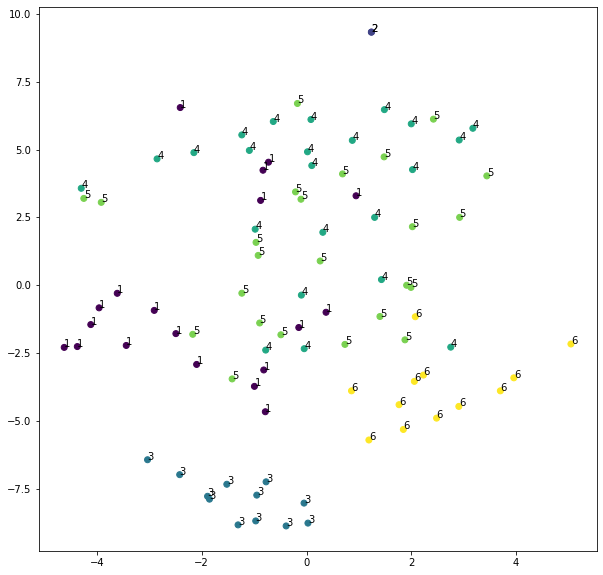

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
琵琶T0262
提取梅尔频谱特征完毕
提取识别特征完毕
74
{'弹': 1, '演奏技法，弹': 2, '演奏技法，泛音': 3, '演奏技法，扫拂': 4, '演奏技法，汇组指法': 5, '演奏技法，摘': 6, '演奏技法，绞弦': 7, '演奏技法，击板': 8, '演奏技法，挑': 9, '演奏技法，弹挑': 10, '演奏技法，长轮': 11, '演奏技法，半轮': 12, '演奏技法，弹打': 13, '演奏技法，打带': 14, '演奏技法，推拉弦': 15, '演奏技法，吟揉': 16}


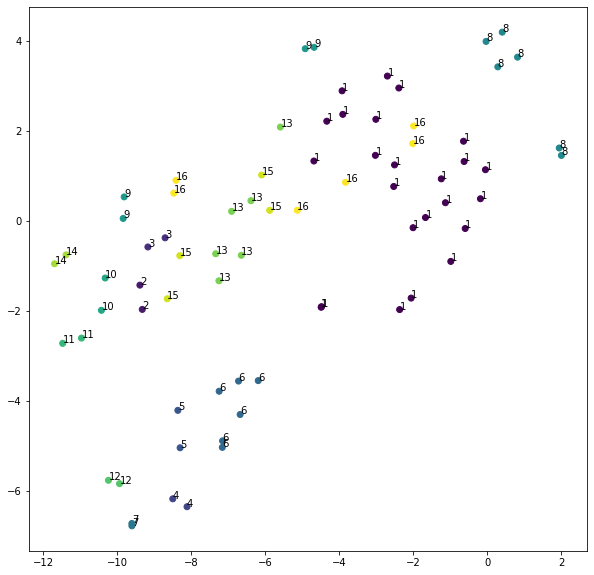

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
碰铃D0247
提取梅尔频谱特征完毕
目标识别乐器：
竹排琴D0315
提取梅尔频谱特征完毕
提取识别特征完毕
34
{'演奏技法，轮音': 1, '演奏技法，八度音程': 2, '演奏技法，五度音程': 3, '演奏技法，三度音程': 4}


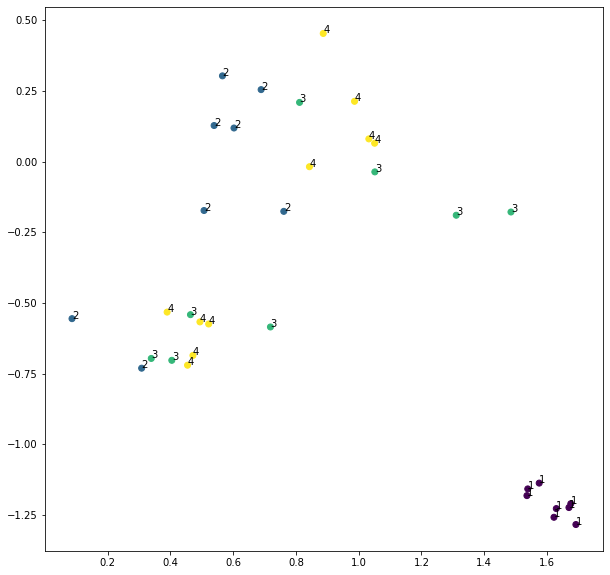

使用总特征
1.0
使用降维后的特征
0.8529411764705882
目标识别乐器：
箜篌T0254
提取梅尔频谱特征完毕
提取识别特征完毕
40
{'演奏技法，摇指': 1, '演奏技法，靠近琴码演奏': 2, '演奏技法，滑音': 3, '演奏技法，颤音': 4, '演奏技法，泛音': 5, '演奏技法，琶音': 6, '演奏技法，和弦': 7, '演奏技法，刮奏': 8, '演奏技法，拍弦': 9, '演奏技法，扫弦': 10}


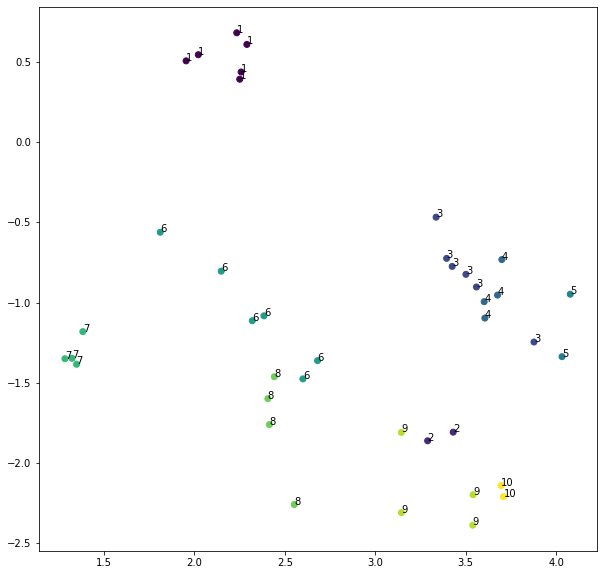

使用总特征
1.0
使用降维后的特征
0.975
目标识别乐器：
管子C0265
提取梅尔频谱特征完毕
提取识别特征完毕
26
{'筒音': 1, '演奏技法，颤音': 2, '演奏技法，弹性音': 3, '演奏技法，滑音': 4}


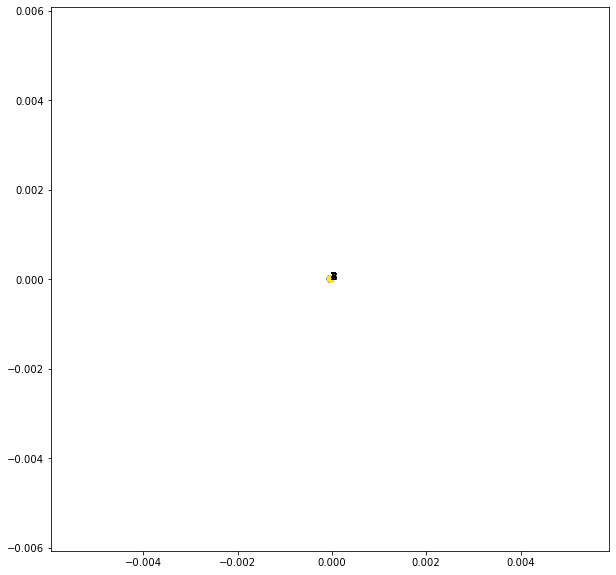

使用总特征
1.0
使用降维后的特征
0.46153846153846156
目标识别乐器：
箫C0282
提取梅尔频谱特征完毕
提取识别特征完毕
52
{'筒音': 1, '演奏技法，单吐': 2, '演奏技法，交打指': 3, '演奏技法，双吐': 4, '演奏技法，三吐': 5, '演奏技法，循环换气': 6, '演奏技法，指颤音': 7, '演奏技法，滑音': 8, '演奏技法，泛音': 9, '演奏技法，叠音': 10, '演奏技法，打音': 11}


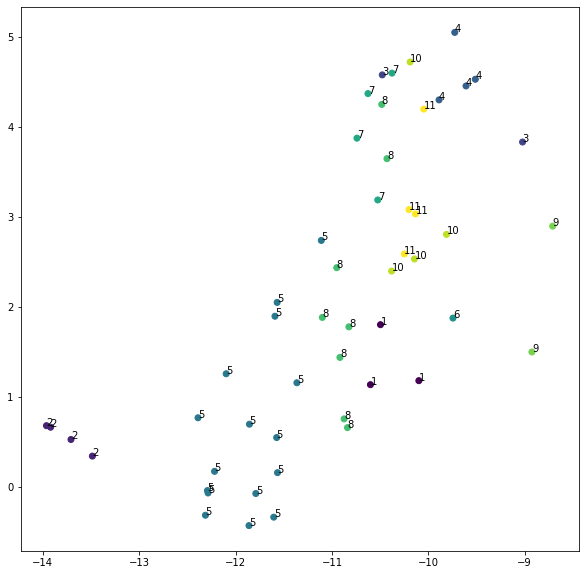

使用总特征
1.0
使用降维后的特征
0.9615384615384616
目标识别乐器：
编铓D0298
提取梅尔频谱特征完毕
提取识别特征完毕
36
{'演奏技法，轮音': 1, '演奏技法，八度音程': 2, '演奏技法，三度音程': 3, '演奏技法，五度音程': 4, '演奏技法，六度音程': 5}


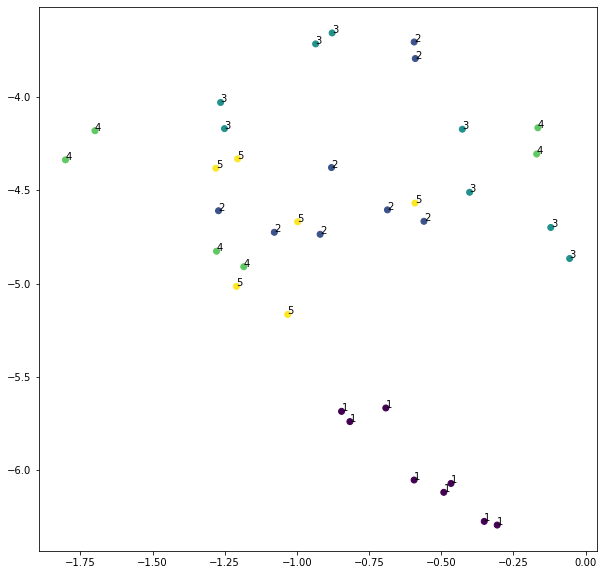

使用总特征
1.0
使用降维后的特征
0.9444444444444444
目标识别乐器：
芦笙C0307
提取梅尔频谱特征完毕
提取识别特征完毕
152
{'演奏技法，传统和声': 1, '演奏技法，颤指': 2, '演奏技法，单音保持': 3, '演奏技法，腹颤音': 4, '演奏技法，单吐': 5, '演奏技法，双吐': 6, '演奏技法，三吐': 7, '演奏技法，花舌': 8, '演奏技法，慢花舌': 9, '演奏技法，呼舌': 10}


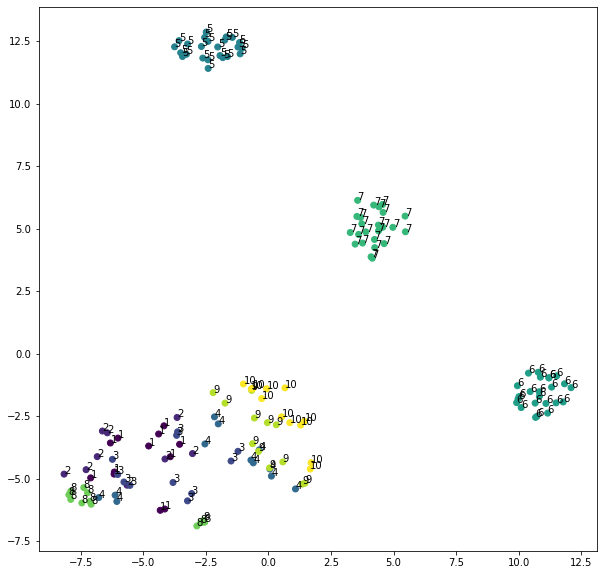

使用总特征
1.0
使用降维后的特征
0.9671052631578947
目标识别乐器：
花盆鼓D0249
提取梅尔频谱特征完毕
提取识别特征完毕
66
{'敲': 1, '演奏技法，鼓边': 2, '演奏技法，鼓梆': 3, '演奏技法，鼓钉': 4, '演奏技法，边击': 5, '演奏技法，锤互击': 6, '演奏技法，滚奏': 7}


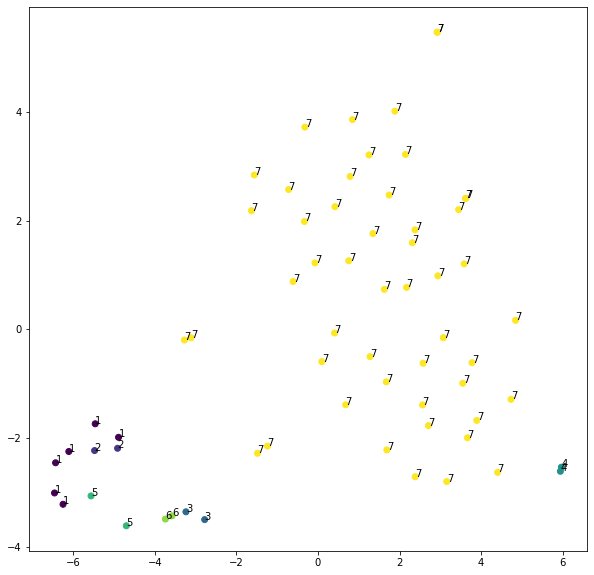

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
草帽镲D0268
提取梅尔频谱特征完毕
提取识别特征完毕
16
{'敲': 1, '演奏技法，磕边': 2, '演奏技法，擦击': 3, '演奏技法，闷击': 4, '演奏技法，磨击': 5, '演奏技法，磕击': 6}


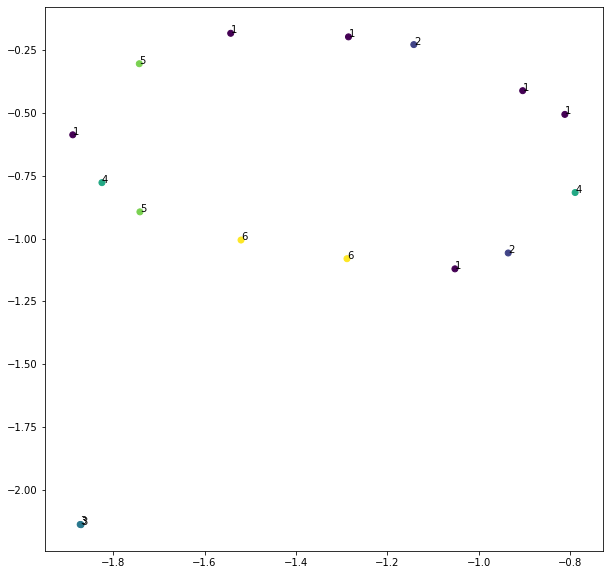

使用总特征
1.0
使用降维后的特征
0.875
目标识别乐器：
葫芦丝C0309
提取梅尔频谱特征完毕
提取识别特征完毕
196
{'筒音': 1, '演奏技法，叠音': 2, '演奏技法，打音': 3, '演奏技法，拨音': 4, '演奏技法，虚指颤音': 5, '演奏技法，滑音': 6, '演奏技法，单吐': 7, '演奏技法，双吐': 8, '演奏技法，三吐': 9, '演奏技法，气震音': 10}


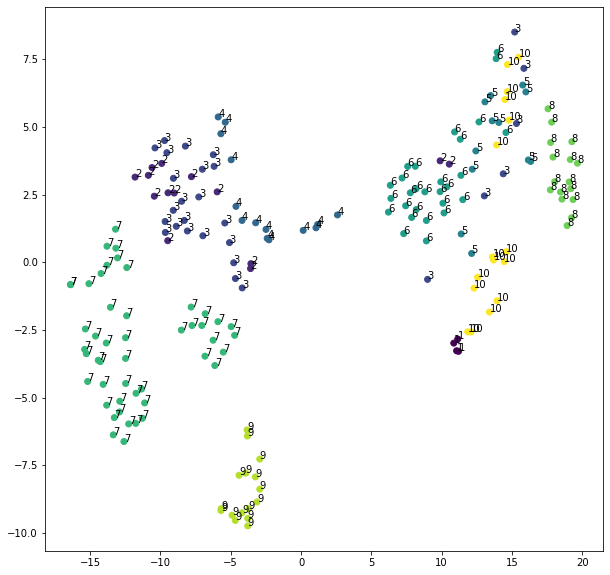

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
葫芦琴L0314
提取梅尔频谱特征完毕
提取识别特征完毕
177
{'空弦音': 1, '演奏技法，双弦': 2, '演奏技法，顿弓': 3, '演奏技法，连顿弓': 4, '演奏技法，连跳弓': 5, '演奏技法，滑音': 6, '演奏技法，打音': 7, '演奏技法，颤音': 8, '演奏技法，揉弦': 9, '演奏技法，跪指拨弦': 10}


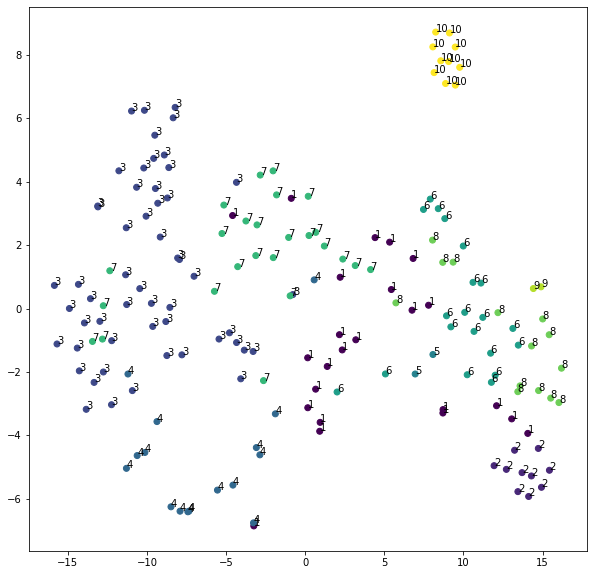

使用总特征
1.0
使用降维后的特征
0.9943502824858758
目标识别乐器：
铙D0269
提取梅尔频谱特征完毕
提取识别特征完毕
16
{'敲': 1, '演奏技法，擦击': 2, '演奏技法，闷击': 3, '演奏技法，磨击': 4, '演奏技法，磕边': 5, '演奏技法，磕击': 6}


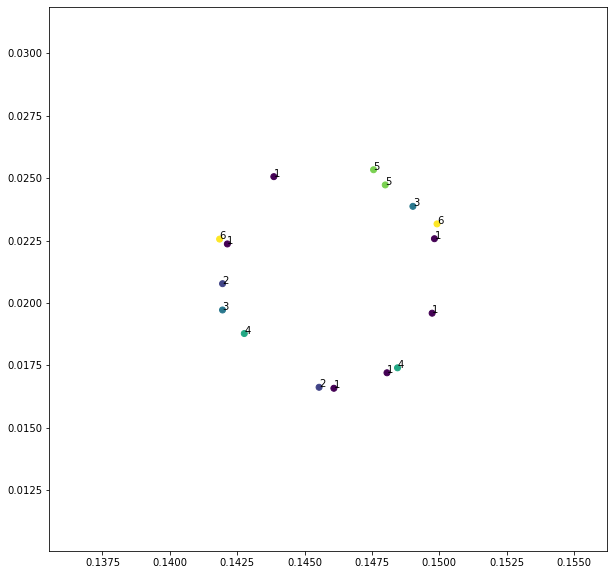

使用总特征
1.0
使用降维后的特征
0.375
目标识别乐器：
铙钹D0270
提取梅尔频谱特征完毕
提取识别特征完毕
16
{'敲': 1, '演奏技法，擦击': 2, '演奏技法，闷击': 3, '演奏技法，磨击': 4, '演奏技法，磕边': 5, '演奏技法，磕击': 6}


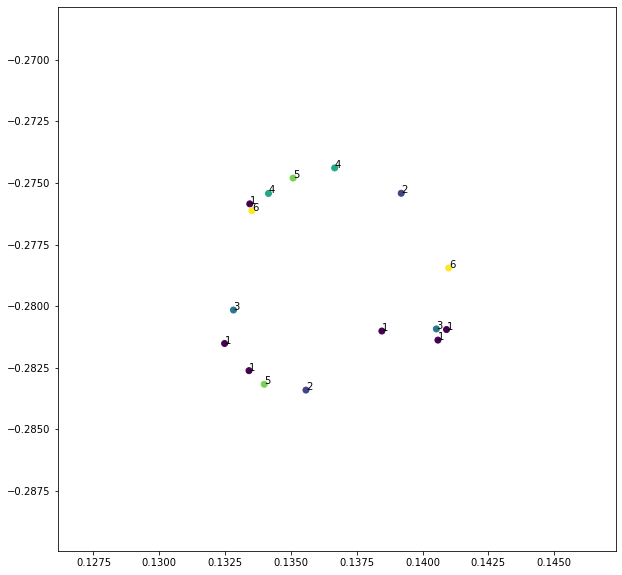

使用总特征
1.0
使用降维后的特征
0.375
目标识别乐器：
雷琴L0256
提取梅尔频谱特征完毕
提取识别特征完毕
72
{'空弦音': 1, '演奏技法，指绪': 2, '演奏技法，连音': 3, '演奏技法，拽绳': 4, '演奏技法，偷换弓': 5, '演奏技法，拾指': 6, '演奏技法，甩腕': 7, '演奏技法，滑音': 8, '演奏技法，打音': 9, '演奏技法，自然泛音': 10, '演奏技法，揉弦': 11, '演奏技法，沉音': 12, '演奏技法，短弓': 13}


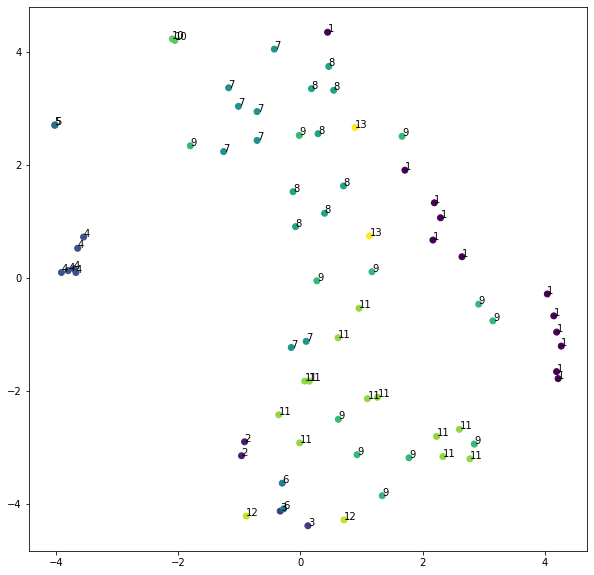

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
马锣D0276
提取梅尔频谱特征完毕
目标识别乐器：
高音板胡L0239
提取梅尔频谱特征完毕
提取识别特征完毕
102
{'空弦音': 1, '演奏技法，上滑音': 2, '演奏技法，抛弓': 3, '演奏技法，垫弓': 4, '演奏技法，下滑音': 5, '演奏技法，回滑音': 6, '演奏技法，垫指滑音': 7, '演奏技法，大上滑音': 8, '演奏技法，大下滑音': 9, '演奏技法，揉弦': 10, '演奏技法，滑揉': 11, '演奏技法，打音': 12}


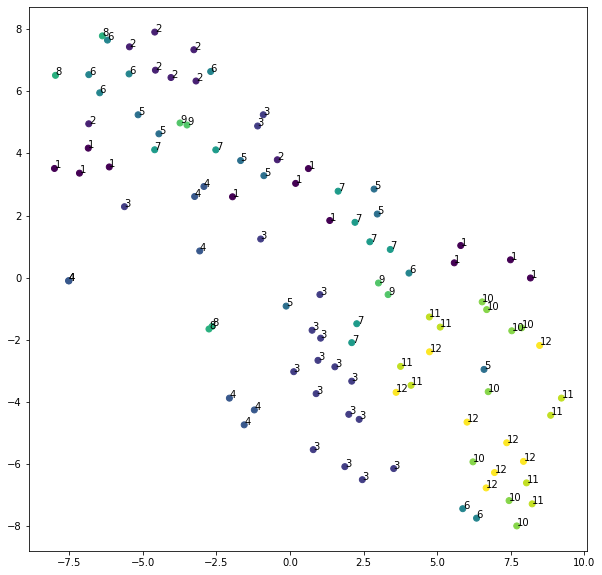

使用总特征
1.0
使用降维后的特征
1.0
目标识别乐器：
高音键笙C0243
提取梅尔频谱特征完毕
提取识别特征完毕
48
{'演奏技法，单吐': 1, '演奏技法，双吐': 2, '演奏技法，三吐': 3, '演奏技法，呼舌': 4, '演奏技法，花舌': 5, '演奏技法，腹颤音': 6, '演奏技法，喉颤音': 7, '演奏技法，传统和音': 8}


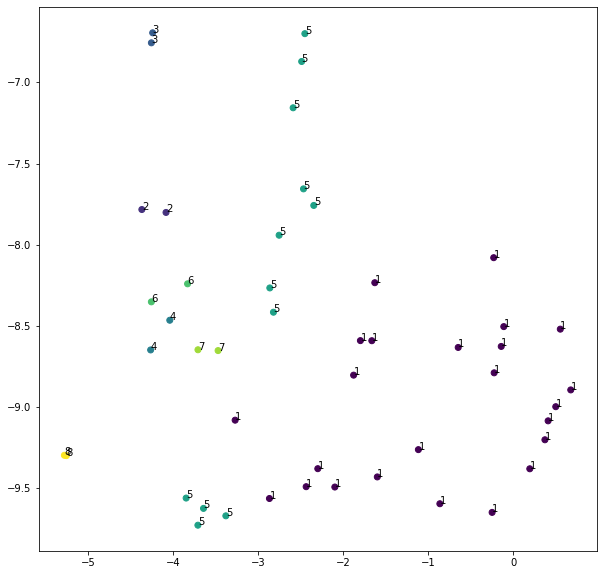

使用总特征
1.0
使用降维后的特征
1.0


In [69]:
for name,j in zip(d,start):
    print("目标识别乐器：")
    print(name)

    audioname = []
    audiofeature = []
    num = 0
    audioset = {}
    for i in range(j,j+d[name]):
        f = GetFeature(i)
        if i is not j:
            if df.iloc[i,2] is not df.iloc[i-1,2]:
                num += 1
        audioname.append(num)
        audioset[str(df.iloc[i,2])] = num
        audiofeature.append(f)
    print("提取梅尔频谱特征完毕")
    
    if len(audioset)==1: continue
        
    features = []
    model = get_model()
    for fea in audiofeature:
        res = extract_features(model,fea)
        features.append(res.tolist())
    print("提取识别特征完毕")
    print(len(features))
    
    X_tsne = TSNE(learning_rate=5).fit_transform(features)
    print(audioset)
    plt.figure(figsize=(10, 10))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=audioname)
    for i in range(len(audioname)):
        plt.text(X_tsne[i,0],X_tsne[i,1],s=audioname[i])
    plt.show()
    
    clf = SVC(C=1,kernel='rbf',gamma=0.1,decision_function_shape='ovr')
    clf.fit(features,audioname)
    y_pre = clf.predict(features)
    print("使用总特征")
    print(accuracy_score(audioname,y_pre))
        
    X = np.array(X_tsne)
    y = np.array(audioname)
    clf = SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr').fit(X, y)
    y_pre = clf.predict(X)
    print("使用降维后的特征")
    print(accuracy_score(y,y_pre))